In [25]:
# Load relevant dependencies/packages
import pandas as pd                   # dataframes/spreadsheets
from tableone import TableOne         # Table1 for binary/categorical outcome
import statsmodels.formula.api as smf # similar to R formula
import statsmodels.api as sm          # similar to sklearn
import seaborn as sns                 # advanced plots
import matplotlib.pyplot as plt       # regular plots
import numpy as np                    # numerical analysis
import sklearn as sk                  # machine learning library, check TensorFlow (graphs) and keras (minimalist neural-nets)
from scipy import stats               # statistical analysis
from scipy.stats import chi2_contingency
import statsmodels.stats.proportion as smp

# Multivariate Analysis of Binary Outcome with more than one predictor


## Knowing the data and Data cleaning
**Example Data** MIMIC-IV is a large, de-identified dataset of electronic health records from the Beth Israel Deaconess Medical Center, containing data on over 65,000 ICU admissions and over 200,000 emergency department visits.

Description. This 'prediction_dataset' is a dataset of 546028 patients with 11 predictor variables and the health outcome 30-day readmission.

* Y1: 30-day Readmission (Binary/Categorical) - The health outcome, the patients that are readmitted to the hospital within 30-days.
* X1​: Charlson Comorbidity Index (CCI) (Categorical) — A measure of overall patient comorbidity; higher scores suggest a greater risk of complications and readmission.
* X2​: Length of Stay (LOS) (Numerical) — Longer stays can reflect severity of illness, which might increase readmission risk.
* X3​: Age (Categorical) — Older age is often associated with a higher risk of readmission.
* X4: Discharge Disposition (Categorical) — Whether the patient was discharged to home, a skilled nursing facility, or another setting can influence readmission likelihood.
* X5​: Major Diagnostic Categories (MCD) (Categorical) — Grouped primary diagnoses into clinically meaningful categories based on affected body systems or etiology, providing a high-level summary of the patient's condition. Certain diagnoses are more prone to readmissions.
* X6: Use of Mechanical Ventilation (Binary/Categorical) — Patients who required ventilation may have a higher risk of complications post-discharge.
* X7​: Medication Count at Discharge (Numerical) — A higher number of medications may indicate complex health issues.
* X8​: Serum Creatinine (Numerical) — Reflects kidney function; abnormalities can suggest chronic conditions that influence readmission risk.
* X9​: Prior Admissions within 1 Year (Categorical) —  Patients with frequent hospitalizations may have chronic conditions or complications that increase the likelihood of readmission.
* X10: Number of Lab Tests Ordered (Numerical) - A higher number of lab tests may indicate greater severity of illness or a more complicated hospital course.
* X11: Diagnosis Count (Numerical) - A higher number of diagnoses during an admission might indicate comorbidities or complications, which could increase readmission risk.

In [26]:
# Read data
df = pd.read_csv ('processed_data/predictors_dataset.csv')
print(df)

        subject_id   hadm_id  cci_score  length_of_stay age_group  \
0         10000032  22595853          1               0    Middle   
1         10000032  22841357          1               1    Middle   
2         10000032  29079034          1               2    Middle   
3         10000032  25742920          1               1    Middle   
4         10000068  25022803          0               0     Young   
...            ...       ...        ...             ...       ...   
546033    19999828  29734428          0              17    Middle   
546034    19999828  25744818          0              10    Middle   
546035    19999840  26071774          0               3    Middle   
546036    19999840  21033226          0               6    Middle   
546037    19999987  23865745          1               8    Middle   

       discharge_disposition  \
0                       HOME   
1                       HOME   
2                       HOME   
3                    HOSPICE   
4          

In [27]:
# Data/Variable types
df.dtypes

subject_id                 int64
hadm_id                    int64
cci_score                  int64
length_of_stay             int64
age_group                 object
discharge_disposition     object
mdc_category              object
ventilation_used           int64
medication_count           int64
serum_creatinine         float64
prior_admissions_1yr      object
num_lab_tests              int64
num_diagnoses              int64
readmitted_30_days         int64
dtype: object

In [28]:
df.isna().sum()

subject_id                    0
hadm_id                       0
cci_score                     0
length_of_stay                0
age_group                     0
discharge_disposition         0
mdc_category                  0
ventilation_used              0
medication_count              0
serum_creatinine         130364
prior_admissions_1yr          0
num_lab_tests                 0
num_diagnoses                 0
readmitted_30_days            0
dtype: int64

In [29]:
# Outcome: 30-Day Readmission, binary variable, with int dtypes
print(df.readmitted_30_days.value_counts())
print(df.readmitted_30_days.value_counts(normalize=True))

readmitted_30_days
0    434993
1    111045
Name: count, dtype: int64
readmitted_30_days
0    0.796635
1    0.203365
Name: proportion, dtype: float64


**Sample Prevalence of 30-Day Readmission: 111045/434993 = 20.34%**

In [30]:
round(df.describe(),2)

,subject_id,hadm_id,cci_score,length_of_stay,ventilation_used,medication_count,serum_creatinine,num_lab_tests,num_diagnoses,readmitted_30_days
count,546038.00,546038.00,546038.00,546038.00,546038.00,546038.00,415674.00,546038.00,546038.00,546038.0
mean,15011168.14,25001001.44,0.10,4.22,0.02,20.11,1.21,154.95,11.66,0.2
std,2877700.14,2888712.37,0.56,7.20,0.14,15.88,1.31,336.58,7.63,0.4
min,10000032.00,20000019.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,12523805.00,22496627.25,0.00,1.00,0.00,10.00,0.70,20.00,6.00,0.0
50%,15019540.00,25003823.00,0.00,2.00,0.00,18.00,0.90,66.00,10.00,0.0
75%,17504013.00,27502821.25,0.00,5.00,0.00,27.00,1.20,165.00,16.00,0.0
max,19999987.00,29999935.00,8.00,515.00,1.00,195.00,29.50,21655.00,57.00,1.0


# Exploratory Data Analysis

## Bivariate Graphical Analysis:

#### Box plots and violin plots to visualize the distribution of the numerical variables (X2, X7, X8, X10, X11) across the two groups (readmitted and not readmitted).

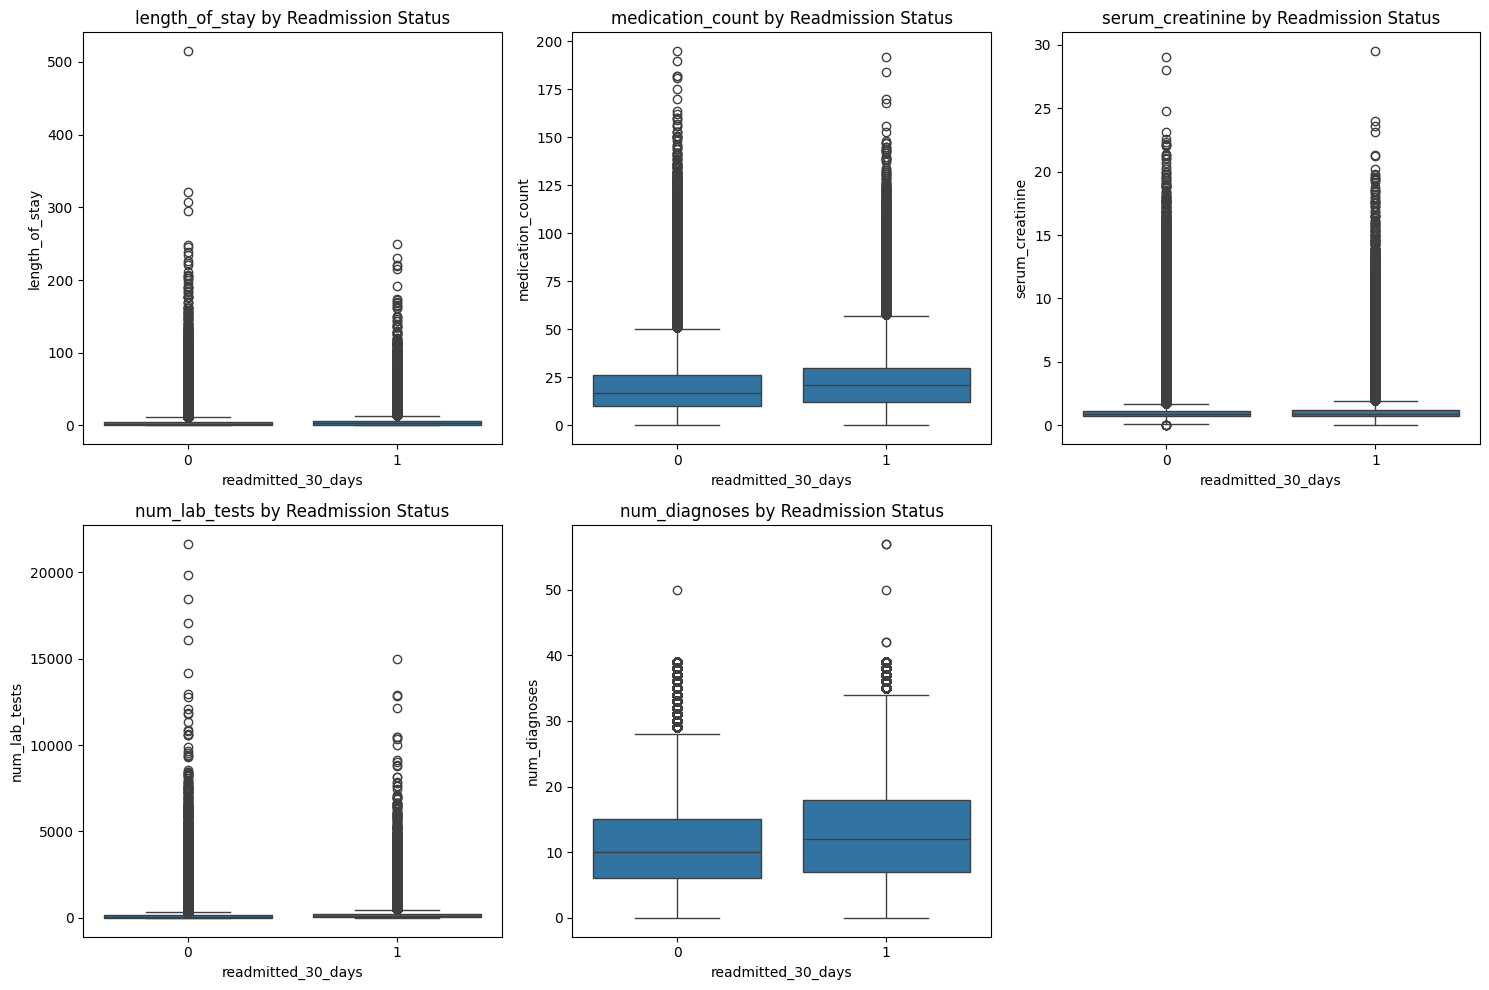

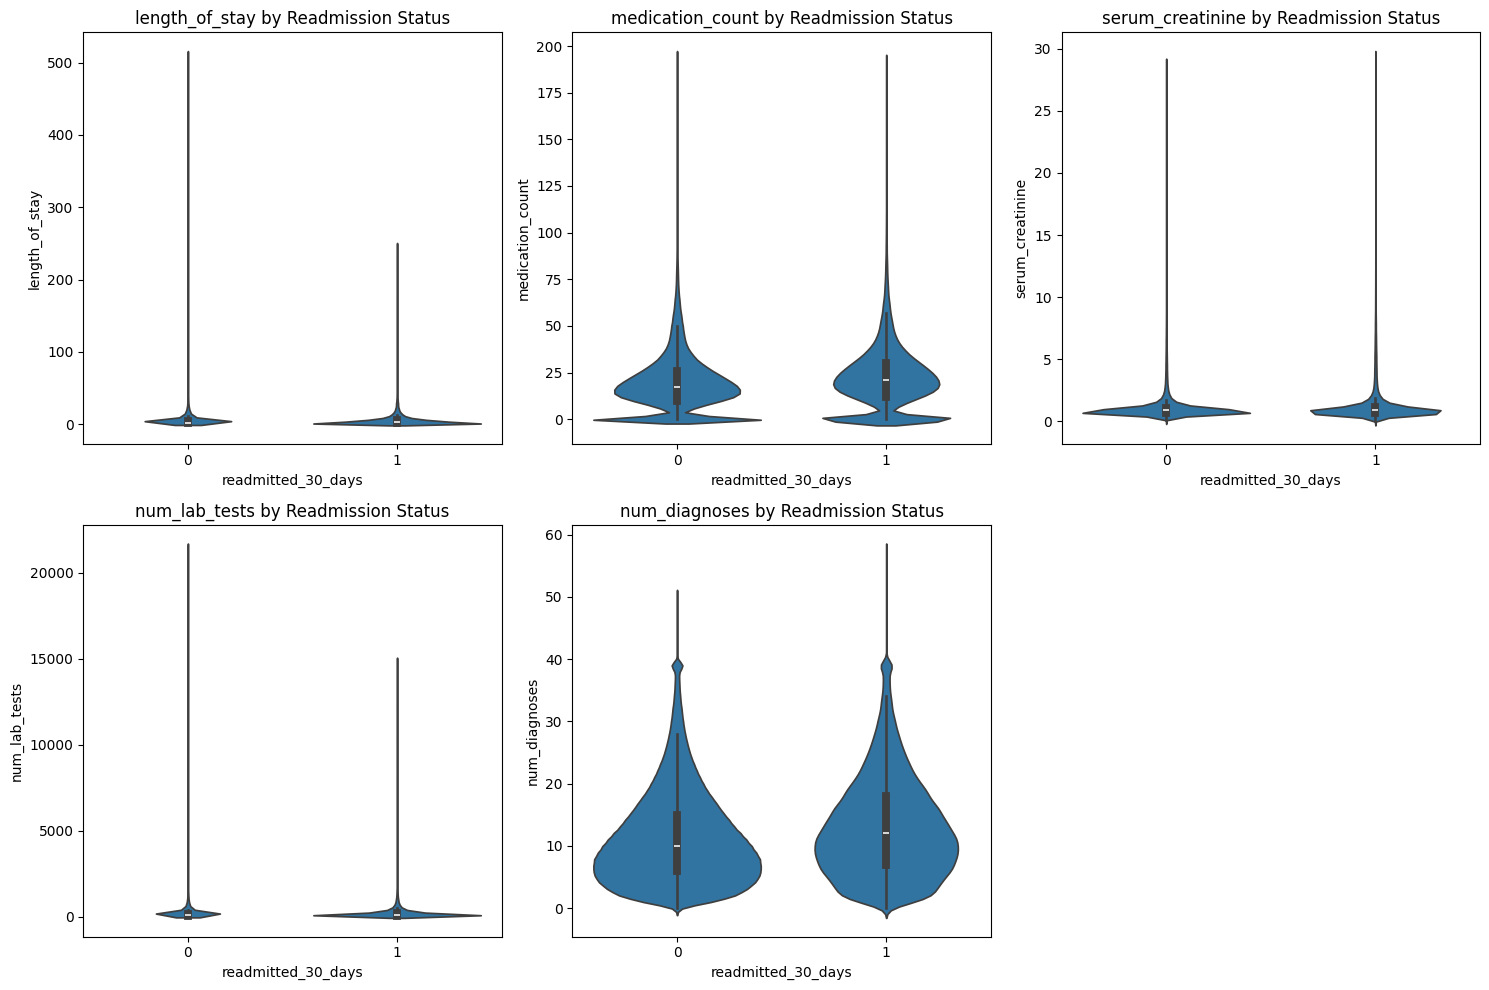

In [31]:
# Select the numerical variables and outcome variable
numerical_vars = ['length_of_stay', 'medication_count', 'serum_creatinine',
                  'num_lab_tests', 'num_diagnoses']
outcome_var = 'readmitted_30_days'

# Create box plots
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 3, i)  # Adjust subplot grid as needed
    sns.boxplot(x=outcome_var, y=var, data=df)
    plt.title(f'{var} by Readmission Status')
plt.tight_layout()
plt.show()

# Create violin plots
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 3, i)  # Adjust subplot grid as needed
    sns.violinplot(x=outcome_var, y=var, data=df)
    plt.title(f'{var} by Readmission Status')
plt.tight_layout()
plt.show()

#### **Brief Summary of Plots:**

The plots visualize the distributions of the numerical variables for patients readmitted within 30 days (readmitted_30_days = 1) and those not readmitted (readmitted_30_days = 0).

**General Observations:**

* **length_of_stay:** Patients who were readmitted tend to have longer lengths of stay during their initial admission. The distribution for the readmitted group is shifted to the right and has a wider spread compared to the non-readmitted group.
* **medication_count:** Patients who were readmitted tend to have a higher number of medications at discharge. The distribution for the readmitted group is also shifted to the right and has a wider spread.
* **serum_creatinine:** Patients who were readmitted tend to have higher serum creatinine levels, indicating potential kidney function issues. The distribution for the readmitted group is shifted to the right, with a slightly higher median and a longer tail.
* **num_lab_tests:** The number of lab tests ordered is slightly higher for patients who were readmitted, but the distributions have significant overlap.
* **num_diagnoses:** Patients who were readmitted tend to have a higher number of diagnoses during their admission. The distribution for the readmitted group is shifted to the right and has a wider spread.

#### **Least and Most Overlap/Separation:**

**Least Overlap/Most Separation:**

* **length_of_stay:** The box plots for length of stay show the least overlap between the readmitted and non-readmitted groups, suggesting a strong association with readmission. The medians are clearly separated, indicating that this variable could be a good predictor.

**Most Overlap/Least Separation:**

* **num_lab_tests:** The distributions for the number of lab tests ordered have the most overlap between the two groups, indicating a weaker association with readmission compared to other variables. The medians are relatively close, suggesting less discriminative power.

#### **In summary:**

The plots indicate that **length_of_stay** is potentially the most important predictor for differentiating between patients readmitted within 30 days and those not, as it exhibits the least overlap and most separation between the outcome groups. **num_lab_tests**, on the other hand, shows a weaker association and might be less helpful in predicting readmission based solely on these visualizations. The other variables (medication_count, serum_creatinine, num_diagnoses) show moderate differences in their distributions and could be valuable predictors.

#### Bar plots or stacked bar plots to visualize the proportions or frequencies of the categorical variables (X1, X3, X4, X5, X6, X9) in each group (readmitted and not readmitted):

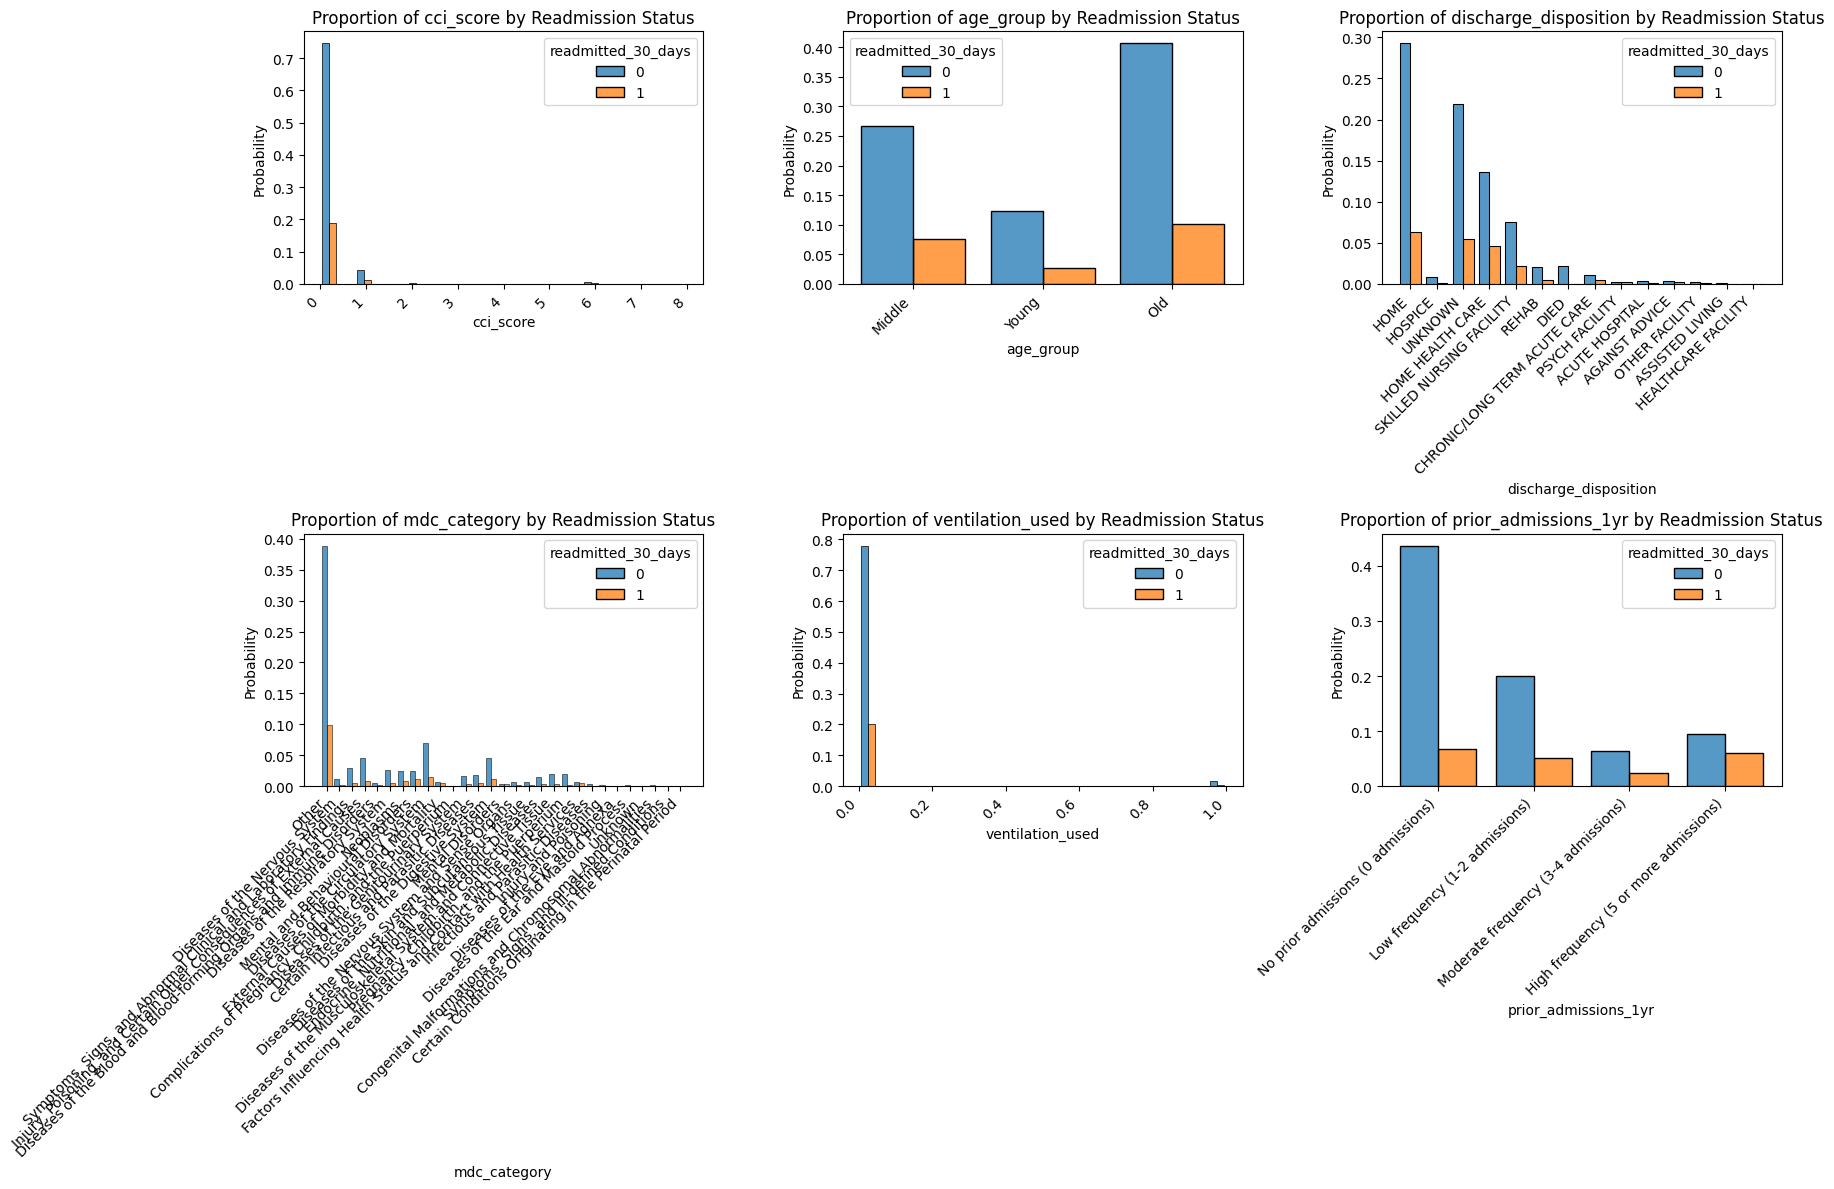

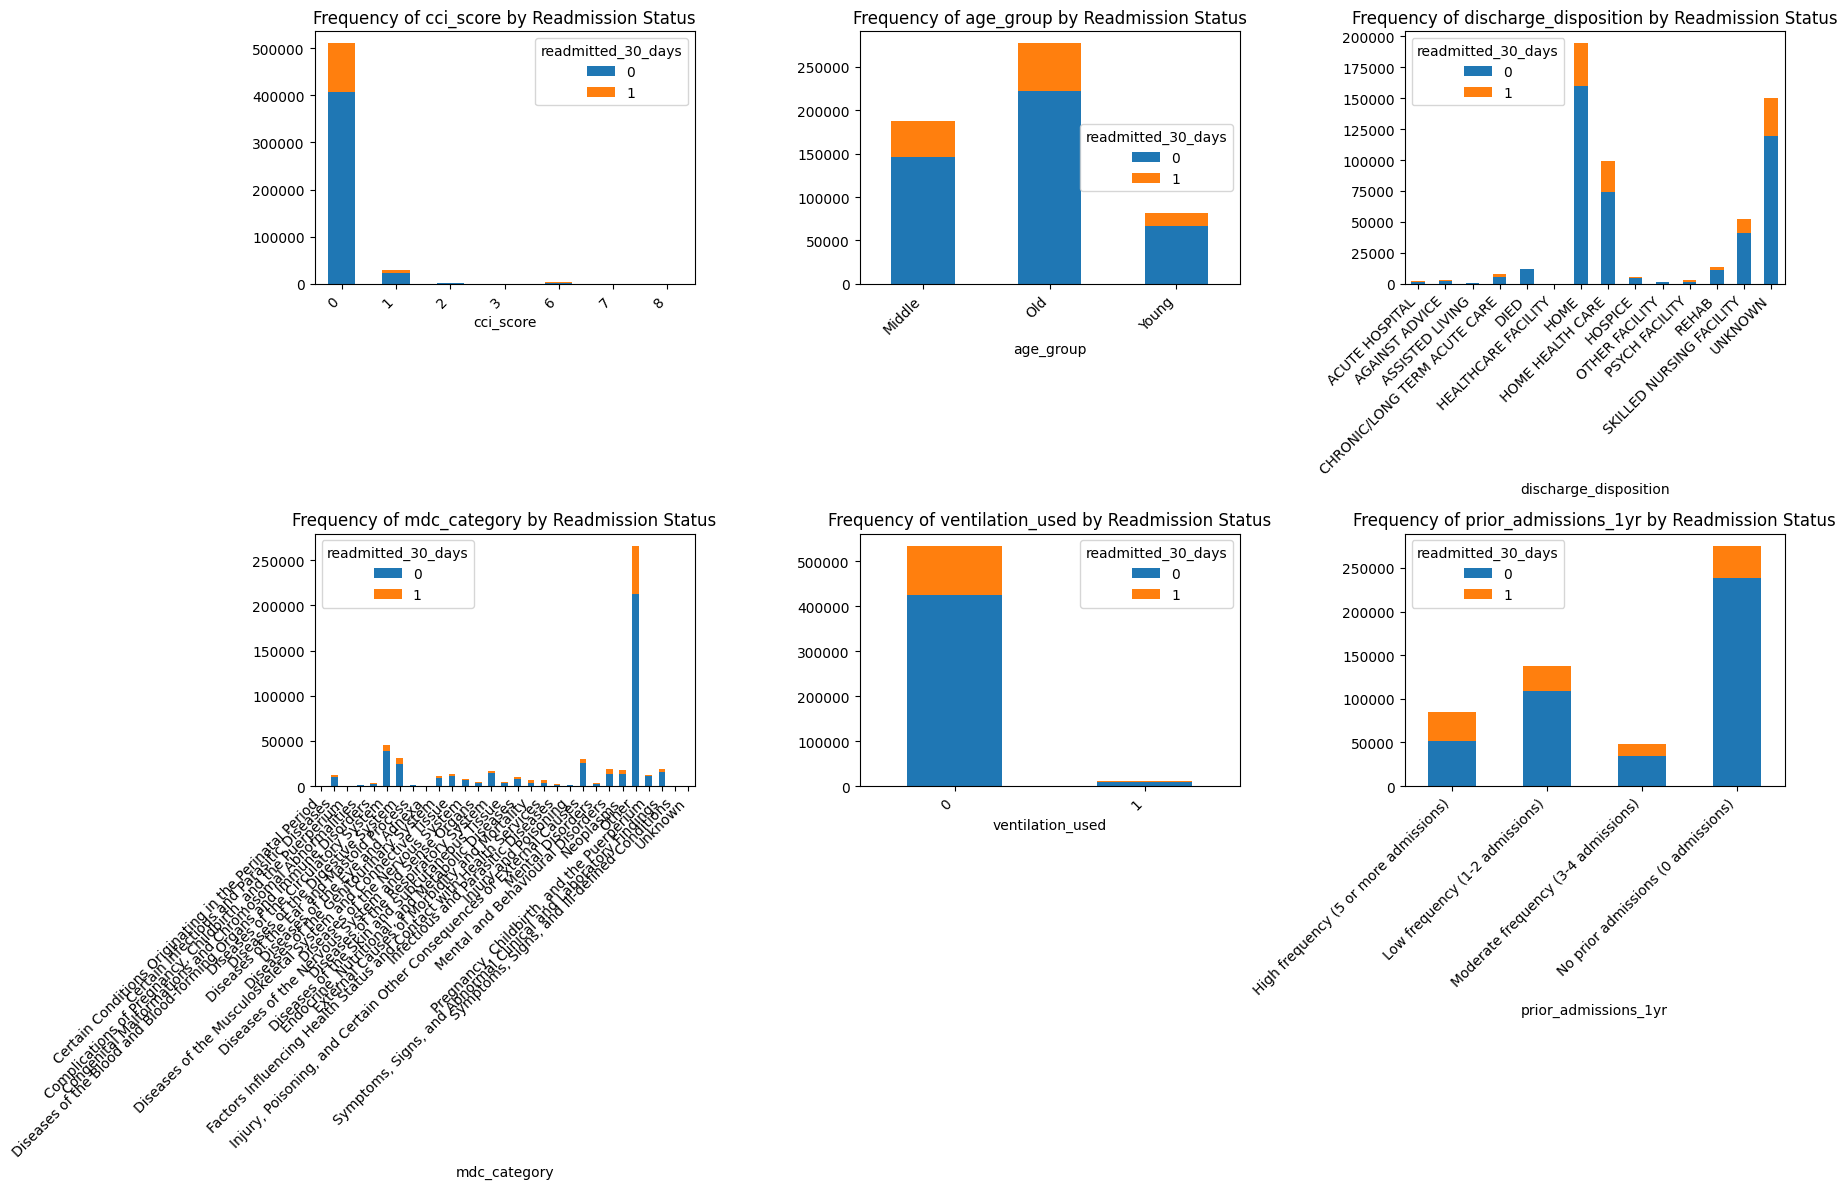

In [32]:
# Select the categorical variables and outcome variable
categorical_vars = ['cci_score', 'age_group', 'discharge_disposition',
                    'mdc_category', 'ventilation_used',
                    'prior_admissions_1yr']
outcome_var = 'readmitted_30_days'

# Create bar plots for proportions (normalized)
plt.figure(figsize=(18, 12))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(x=var, hue=outcome_var, data=df, stat="probability", multiple="dodge", shrink=.8)
    plt.title(f'Proportion of {var} by Readmission Status')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Create stacked bar plots for frequencies (counts)
plt.figure(figsize=(18, 12))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    ct = pd.crosstab(df[var], df[outcome_var])
    ct.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Frequency of {var} by Readmission Status')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **Brief Summary of Plots:**

The plots visualize the distributions of the categorical variables for patients readmitted within 30 days (readmitted_30_days = 1) and those not readmitted (readmitted_30_days = 0), either as proportions (bar plots) or frequencies (stacked bar plots).

**General Observations:**

The plots show variations in the proportions or frequencies of different categories within each outcome group.
Some categories seem to be more prevalent in the readmitted group compared to the non-readmitted group, indicating potential associations with readmission.

#### **Apparent Associations or Differences:**

Based on the visualizations, here are some apparent associations or differences between the predictor variables and the readmission outcome:

* **cci_score:** Higher CCI scores appear to be associated with a higher likelihood of readmission. The proportion of patients with higher CCI scores (e.g., 5-6, 7+) is greater in the readmitted group.
* **age_group:** Older age groups (e.g., 65-74, 75+) show a higher proportion of readmissions compared to younger age groups.
* **discharge_disposition:** Certain discharge dispositions, such as "Home with Home Health Care" and "Skilled Nursing Facility," seem to be associated with a higher likelihood of readmission.
* **mdc_category:** Some major diagnostic categories, like "Diseases of the Circulatory System" and "Diseases of the Respiratory System," show a higher proportion of readmissions compared to other categories.
* **ventilation_used:** Patients who used ventilation during their initial admission have a considerably higher proportion of readmissions compared to those who did not use ventilation.
* **prior_admissions_1yr:** Patients with prior admissions within the past year, especially those with 2 or more prior admissions, show a significantly higher proportion of readmissions.

#### **In summary:**

The plots suggest that several categorical variables are associated with the readmission outcome. Variables like higher CCI scores, older age, specific discharge dispositions, certain major diagnostic categories, ventilation use, and prior admissions within the past year appear to be linked to an increased likelihood of readmission within 30 days.

## Correlation Analysis:

#### For the numerical predictors (X2, X7, X8, X10, X11), calculate the Mean Difference between each variable and the binary readmission outcome (0 for not readmitted, 1 for readmitted).

In [33]:
def mean_diff_ci(data, continuous_var):
    # Drop rows with NaN in the specified continuous variable
    data = data.dropna(subset=[continuous_var])

    group1 = data[data['readmitted_30_days'] == 0][continuous_var]
    group2 = data[data['readmitted_30_days'] == 1][continuous_var]
    t_stat, p_value = stats.ttest_ind(group1, group2)
    mean_diff = group2.mean() - group1.mean()
    ci = stats.t.interval(0.95, len(group1) + len(group2) - 2, loc=mean_diff, scale=stats.sem(group1) + stats.sem(group2))
    return mean_diff, ci[0], ci[1]

for var in ['length_of_stay', 'medication_count', 'serum_creatinine', 'num_lab_tests', 'num_diagnoses']:
    mean_d, lower_ci, upper_ci = mean_diff_ci(df, var)
    print(f"{var}: Mean Difference = {mean_d:.3f}, 95% CI = ({lower_ci:.3f}, {upper_ci:.3f})")

length_of_stay: Mean Difference = 0.998, 95% CI = (0.930, 1.067)
medication_count: Mean Difference = 2.400, 95% CI = (2.255, 2.546)
serum_creatinine: Mean Difference = 0.144, 95% CI = (0.130, 0.159)
num_lab_tests: Mean Difference = 49.984, 95% CI = (46.701, 53.268)
num_diagnoses: Mean Difference = 1.641, 95% CI = (1.572, 1.710)


In [66]:
# Define the function to calculate mean difference and confidence interval
def mean_diff_ci(data, continuous_var):
    # Drop rows with NaN in the specified continuous variable
    data = data.dropna(subset=[continuous_var])

    group1 = data[data['readmitted_30_days'] == 0][continuous_var]
    group2 = data[data['readmitted_30_days'] == 1][continuous_var]
    t_stat, p_value = stats.ttest_ind(group1, group2)
    mean_diff = group2.mean() - group1.mean()
    ci = stats.t.interval(0.95, len(group1) + len(group2) - 2, loc=mean_diff, scale=stats.sem(group1) + stats.sem(group2))
    return mean_diff, ci[0], ci[1]

# List of numerical predictors
numerical_predictors = ['length_of_stay', 'medication_count', 'serum_creatinine', 'num_lab_tests', 'num_diagnoses']

# Calculate mean difference and confidence intervals for each predictor
mean_diff_results = []
for predictor in numerical_predictors:
    mean_d, lower_ci, upper_ci = mean_diff_ci(df, predictor)
    mean_diff_results.append([predictor, mean_d, lower_ci, upper_ci])

# Create a DataFrame from the results
mean_diff_df = pd.DataFrame(mean_diff_results, columns=['Variable', 'Mean Difference', 'Lower CI', 'Upper CI'])

# Display the DataFrame
display(mean_diff_df)

# Save the DataFrame to a CSV file
mean_diff_df.to_excel('results/tables/mean_diff_results.xlsx', index=False)

,Variable,Mean Difference,Lower CI,Upper CI
0,length_of_stay,0.998436,0.929598,1.067273
1,medication_count,2.400156,2.254642,2.545670
2,serum_creatinine,0.144262,0.129946,0.158579
3,num_lab_tests,49.984423,46.701139,53.267707
4,num_diagnoses,1.641088,1.571933,1.710243


### **Interpretation:**

The results show the mean difference in each numerical predictor between the readmitted and not readmitted groups, along with the 95% confidence intervals for these differences.

1. Length of Stay (length_of_stay):
  * Mean Difference: 0.998
  * 95% CI: (0.930, 1.067)
  * Interpretation: On average, patients who were readmitted had a length of stay that was about 0.998 days longer than those who were not readmitted. The confidence interval (0.930, 1.067) indicates that we are 95% confident that the true mean difference in length of stay falls within this range. Since the interval does not include 0, the difference is statistically significant. This means that patients who are readmitted tend to have longer hospital stays.

2. Medication Count (medication_count):
  * Mean Difference: 2.400
  * 95% CI: (2.255, 2.546)
  * Interpretation: On average, patients who were readmitted were prescribed about 2.4 more medications at discharge than those who were not readmitted. The confidence interval (2.255, 2.546) suggests that we are 95% confident that the true mean difference in medication count falls within this range. Since the interval does not include 0, the difference is statistically significant, indicating that patients who are readmitted tend to have a higher medication count at discharge.

3. Serum Creatinine (serum_creatinine):
  * Mean Difference: 0.144
  * 95% CI: (0.130, 0.159)
  * Interpretation: On average, patients who were readmitted had serum creatinine levels that were about 0.144 units higher than those who were not readmitted. The confidence interval (0.130, 0.159) suggests that we are 95% confident that the true mean difference in serum creatinine falls within this range. Since the interval does not include 0, the difference is statistically significant, indicating that patients who are readmitted tend to have higher serum creatinine levels.

4. Number of Lab Tests (num_lab_tests):
  * Mean Difference: 49.984
  * 95% CI: (46.701, 53.268)
  * Interpretation: On average, patients who were readmitted had about 49.984 more lab tests ordered during their hospital stay compared to those who were not readmitted. The confidence interval (46.701, 53.268) suggests that we are 95% confident that the true mean difference in the number of lab tests falls within this range. Since the interval does not include 0, the difference is statistically significant, indicating that patients who are readmitted tend to have a higher number of lab tests ordered.

5. Number of Diagnoses (num_diagnoses):
  * Mean Difference: 1.641
  * 95% CI: (1.572, 1.710)
  * Interpretation: On average, patients who were readmitted had about 1.641 more diagnoses recorded during their hospital stay compared to those who were not readmitted. The confidence interval (1.572, 1.710) suggests that we are 95% confident that the true mean difference in the number of diagnoses falls within this range. Since the interval does not include 0, the difference is statistically significant, indicating that patients who are readmitted tend to have a higher number of diagnoses.

---
#### **Overall Summary:**
The results consistently show that patients who are readmitted within 30 days tend to have:
  * Longer lengths of stay
  * Higher medication counts at discharge
  * Higher serum creatinine levels
  * A higher number of lab tests ordered
  * A higher number of diagnoses

#### For the numerical predictors (X2, X7, X8, X10, X11), calculate the Per-Unit Change (PCC) between each variable and the binary readmission outcome (0 for not readmitted, 1 for readmitted).

In [34]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming your DataFrame is named 'df'

# Select the numerical predictors and the outcome variable
numerical_predictors = ['length_of_stay', 'medication_count', 'serum_creatinine', 'num_lab_tests', 'num_diagnoses']
outcome_variable = 'readmitted_30_days'

# Function to calculate PCC and CI
def calculate_pcc_ci(data, predictor, outcome):
    group1 = data[data[outcome] == 0][predictor]
    group2 = data[data[outcome] == 1][predictor]

    mean_diff = group2.mean() - group1.mean()

    # Calculate pooled standard deviation
    pooled_sd = np.sqrt(((len(group1) - 1) * group1.var() + (len(group2) - 1) * group2.var()) / (len(group1) + len(group2) - 2))

    # Calculate standard error of the difference
    se_diff = pooled_sd * np.sqrt(1/len(group1) + 1/len(group2))

    # Calculate confidence interval
    ci = stats.t.interval(0.95, len(group1) + len(group2) - 2, loc=mean_diff, scale=se_diff)

    # Calculate PCC and its CI
    pcc = mean_diff / group1.mean()
    pcc_lower = ci[0] / group1.mean()
    pcc_upper = ci[1] / group1.mean()

    return pcc, pcc_lower, pcc_upper

# Calculate and print PCC with CI for each predictor
for predictor in numerical_predictors:
    pcc, lower_ci, upper_ci = calculate_pcc_ci(df, predictor, outcome_variable)
    print(f"Per-Unit Change (PCC) for {predictor}: {pcc:.3f} (95% CI: {lower_ci:.3f}, {upper_ci:.3f})")

Per-Unit Change (PCC) for length_of_stay: 0.248 (95% CI: 0.237, 0.260)
Per-Unit Change (PCC) for medication_count: 0.122 (95% CI: 0.117, 0.128)
Per-Unit Change (PCC) for serum_creatinine: 0.122 (95% CI: 0.115, 0.130)
Per-Unit Change (PCC) for num_lab_tests: 0.345 (95% CI: 0.330, 0.361)
Per-Unit Change (PCC) for num_diagnoses: 0.145 (95% CI: 0.141, 0.149)


In [65]:
# Create a list to store the per-unit change results
pcc_results = []

# Define the function to calculate PCC and CI
def calculate_pcc_ci(data, predictor, outcome):
    group1 = data[data[outcome] == 0][predictor]
    group2 = data[data[outcome] == 1][predictor]

    mean_diff = group2.mean() - group1.mean()

    # Calculate pooled standard deviation
    pooled_sd = np.sqrt(((len(group1) - 1) * group1.var() + (len(group2) - 1) * group2.var()) / (len(group1) + len(group2) - 2))

    # Calculate standard error of the difference
    se_diff = pooled_sd * np.sqrt(1/len(group1) + 1/len(group2))

    # Calculate confidence interval
    ci = stats.t.interval(0.95, len(group1) + len(group2) - 2, loc=mean_diff, scale=se_diff)

    # Calculate PCC and its CI
    pcc = mean_diff / group1.mean()
    pcc_lower = ci[0] / group1.mean()
    pcc_upper = ci[1] / group1.mean()

    return pcc, pcc_lower, pcc_upper

# Calculate and store PCC with CI for each numerical predictor
for predictor in numerical_predictors:
    pcc, lower_ci, upper_ci = calculate_pcc_ci(df, predictor, outcome_variable)
    pcc_results.append([predictor, pcc, lower_ci, upper_ci])

# Create a DataFrame from the results
pcc_df = pd.DataFrame(pcc_results, columns=['Variable', 'PCC', 'Lower CI', 'Upper CI'])

# Display the DataFrame
display(pcc_df)

# Save the DataFrame to a CSV file
pcc_df.to_excel('results/tables/pcc_results.xlsx', index=False)

,Variable,PCC,Lower CI,Upper CI
0,length_of_stay,0.248475,0.236684,0.260266
1,medication_count,0.122351,0.117027,0.127675
2,serum_creatinine,0.122373,0.115064,0.129682
3,num_lab_tests,0.345242,0.329950,0.360534
4,num_diagnoses,0.144941,0.140516,0.149366


#### **Interpretation:**

The results show the Per-Unit Change (PCC) in each numerical predictor for a one-unit change in the readmission outcome (from 0 to 1), along with the 95% confidence intervals for these changes.

1. Length of Stay (length_of_stay):
  * PCC: 0.248
  * 95% CI: (0.237, 0.260)
  * Interpretation: For each one-unit increase in the readmission outcome (i.e., going from not readmitted to readmitted), the length of stay is expected to increase by 0.248 days, on average. The confidence interval (0.237, 0.260) indicates that we are 95% confident that the true per-unit change in length of stay falls within this range. Since the interval does not include 0, the change is statistically significant.

2. Medication Count (medication_count):
  * PCC: 0.122
  * 95% CI: (0.117, 0.128)
  *Interpretation: For each one-unit increase in the readmission outcome, the medication count is expected to increase by 0.122, on average. The confidence interval (0.117, 0.128) suggests that we are 95% confident that the true per-unit change in medication count falls within this range. Since the interval does not include 0, the change is statistically significant.

3. Serum Creatinine (serum_creatinine):
  * PCC: 0.122
  * 95% CI: (0.115, 0.130)
  * Interpretation: For each one-unit increase in the readmission outcome, the serum creatinine level is expected to increase by 0.122, on average. The confidence interval (0.115, 0.130) suggests that we are 95% confident that the true per-unit change in serum creatinine falls within this range. Since the interval does not include 0, the change is statistically significant.

4. Number of Lab Tests (num_lab_tests):
  * PCC: 0.345
  * 95% CI: (0.330, 0.361)
  * Interpretation: For each one-unit increase in the readmission outcome, the number of lab tests is expected to increase by 0.345, on average. The confidence interval (0.330, 0.361) suggests that we are 95% confident that the true per-unit change in the number of lab tests falls within this range. Since the interval does not include 0, the change is statistically significant.

5. Number of Diagnoses (num_diagnoses):
  * PCC: 0.145
  * 95% CI: (0.141, 0.149)
  * Interpretation: For each one-unit increase in the readmission outcome, the number of diagnoses is expected to increase by 0.145, on average. The confidence interval (0.141, 0.149) suggests that we are 95% confident that the true per-unit change in the number of diagnoses falls within this range. Since the interval does not include 0, the change is statistically significant.
---
#### **Overall Summary:**

These results provide insights into the magnitude of change in the numerical predictors associated with readmission. They indicate that readmitted patients tend to have higher values for these predictors compared to non-readmitted patients. The confidence intervals provide a range within which we can be confident about the true per-unit change. Since none of the confidence intervals include 0, all the observed changes are statistically significant, suggesting a real relationship between these predictors and readmission.

#### For the numerical predictors (X2, X7, X8, X10, X11), calculate the Pearson correlation coefficient between each variable and the binary readmission outcome (0 for not readmitted, 1 for readmitted).


In [35]:
# Select the numerical predictors and the outcome variable
numerical_predictors = ['length_of_stay', 'medication_count', 'serum_creatinine',
                        'num_lab_tests', 'num_diagnoses']
outcome_variable = 'readmitted_30_days'

# Create a copy of the DataFrame to avoid modifying the original data
df_cleaned = df.copy()

# Remove rows with missing values in 'serum_creatinine'
df_cleaned = df_cleaned.dropna(subset=['serum_creatinine'])


# Calculate Pearson correlation coefficients and confidence intervals
correlations = df_cleaned[[outcome_variable] + numerical_predictors].corr()[outcome_variable].drop(outcome_variable)

for predictor in numerical_predictors:
    r, p = stats.pearsonr(df_cleaned[outcome_variable], df_cleaned[predictor])

    # Calculate confidence intervals using Fisher's z-transformation
    r_z = np.arctanh(r)
    se = 1/np.sqrt(df_cleaned.shape[0]-3)  # Use df_cleaned.shape[0]
    z = stats.norm.ppf(1-0.05/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))

    print(f"Pearson correlation between {predictor} and {outcome_variable}: {r:.3f} (95% CI: {lo:.3f}, {hi:.3f}) (p-value: {p:.3f})")

Pearson correlation between length_of_stay and readmitted_30_days: 0.060 (95% CI: 0.057, 0.063) (p-value: 0.000)
Pearson correlation between medication_count and readmitted_30_days: 0.071 (95% CI: 0.068, 0.074) (p-value: 0.000)
Pearson correlation between serum_creatinine and readmitted_30_days: 0.045 (95% CI: 0.042, 0.048) (p-value: 0.000)
Pearson correlation between num_lab_tests and readmitted_30_days: 0.058 (95% CI: 0.055, 0.061) (p-value: 0.000)
Pearson correlation between num_diagnoses and readmitted_30_days: 0.088 (95% CI: 0.085, 0.091) (p-value: 0.000)


In [63]:
# Create a list to store the results
results = []

# Create a copy of the DataFrame to avoid modifying the original data
pearson_corr = df.copy()

# Remove rows with missing values in 'serum_creatinine'
pearson_corr = df_cleaned.dropna(subset=['serum_creatinine'])

# Select the numerical predictors and the outcome variable
numerical_predictors = ['length_of_stay', 'medication_count', 'serum_creatinine',
                        'num_lab_tests', 'num_diagnoses']
outcome_variable = 'readmitted_30_days'

# Calculate Pearson correlation coefficients and confidence intervals
correlations = df_cleaned[[outcome_variable] + numerical_predictors].corr()[outcome_variable].drop(outcome_variable)

for predictor in numerical_predictors:
    r, p = stats.pearsonr(df_cleaned[outcome_variable], df_cleaned[predictor])

    # Calculate confidence intervals using Fisher's z-transformation
    r_z = np.arctanh(r)
    se = 1/np.sqrt(df_cleaned.shape[0]-3)  # Use df_cleaned.shape[0]
    z = stats.norm.ppf(1-0.05/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))

    results.append([predictor, f"{r:.3f} ({lo:.3f}, {hi:.3f})"])

# Create a DataFrame from the results
pearson_corr = pd.DataFrame(results, columns=['Variable', 'Pearson Correlation (CI)'])

# Display the DataFrame
display(pearson_corr)

pearson_corr.to_excel('results/tables/pearson_corr.xlsx', index=False)

,Variable,Pearson Correlation (CI)
0,length_of_stay,"0.060 (0.057, 0.063)"
1,medication_count,"0.071 (0.068, 0.074)"
2,serum_creatinine,"0.045 (0.042, 0.048)"
3,num_lab_tests,"0.058 (0.055, 0.061)"
4,num_diagnoses,"0.088 (0.085, 0.091)"


#### **Interpretation:**

**Direction:**

All the correlation coefficients are positive, indicating a positive linear relationship between each numerical predictor and the readmission outcome. This means that as the value of the predictor increases, the likelihood of readmission (outcome = 1) also tends to increase.

**Strength:**
* **Weak:** All the correlation coefficients are relatively small, ranging from 0.045 to 0.088. This suggests weak linear relationships between these numerical predictors and the readmission outcome.
* **Relative Strength:** Among the predictors, num_diagnoses has the highest correlation coefficient (0.088), indicating a slightly stronger positive relationship with readmission compared to the other predictors. serum_creatinine has the lowest correlation coefficient (0.045), suggesting the weakest linear relationship.

#### **Overall Assessment:**

The correlation coefficients indicate that while there are positive linear relationships between these numerical predictors and readmission, the relationships are generally weak. This means that these predictors, when considered individually and linearly, have limited ability to strongly predict readmission.

**Important Considerations:**

* **Linearity:** Pearson correlation only measures linear relationships. If the relationships are non-linear, the correlation coefficients might underestimate the true strength of the association.
* **Confounding:** These correlations are bivariate, meaning they only consider the relationship between one predictor and the outcome at a time. Other factors (confounders) might influence both the predictor and the outcome, leading to spurious correlations. Multivariate analysis is needed to control for confounders and assess the independent effects of each predictor.
* **Clinical Significance:** While the correlations are statistically significant, it's important to consider their clinical significance. Even weak correlations might be clinically relevant depending on the context and the impact of the predictor on the outcome.

#### **In conclusion:**

The correlation analysis suggests weak positive linear relationships between the numerical predictors (length of stay, medication count, serum creatinine, number of lab tests, and number of diagnoses) and the readmission outcome. However, these relationships should be interpreted cautiously, considering the limitations of Pearson correlation and the need for further analysis to assess the true strength and clinical significance of these associations

#### For categorical variables (X1, X3, X4, X5, X6, X9), calculate the Odds Ratio (OR) between each variable and the binary readmission outcome (0 for not readmitted, 1 for readmitted).

In [36]:
# Select the categorical predictors and the outcome variable
categorical_predictors = ['cci_score', 'age_group', 'discharge_disposition',
                           'mdc_category', 'ventilation_used',
                           'prior_admissions_1yr']
outcome_variable = 'readmitted_30_days'

# Function to calculate odds ratio and confidence interval for a specific category
def calculate_odds_ratio_ci(df, predictor, category, outcome):
    # Create a contingency table
    contingency_table = pd.crosstab(df[predictor] == category, df[outcome])

    # Calculate odds ratio and confidence interval using statsmodels
    table = sm.stats.Table2x2(contingency_table)
    odds_ratio = table.oddsratio
    odds_ratio_ci = table.oddsratio_confint()  # Get confidence interval

    return odds_ratio, odds_ratio_ci

# Calculate and print odds ratios with confidence intervals for each category
for predictor in categorical_predictors:
    unique_categories = df[predictor].unique()
    for category in unique_categories:
        odds_ratio, odds_ratio_ci = calculate_odds_ratio_ci(df, predictor, category, outcome_variable)
        print(f"Odds Ratio for {predictor} ({category}) and {outcome_variable}: {odds_ratio:.3f} (95% CI: {odds_ratio_ci[0]:.3f}, {odds_ratio_ci[1]:.3f})")
    print()

Odds Ratio for cci_score (1) and readmitted_30_days: 1.148 (95% CI: 1.116, 1.181)
Odds Ratio for cci_score (0) and readmitted_30_days: 0.827 (95% CI: 0.807, 0.849)
Odds Ratio for cci_score (2) and readmitted_30_days: 1.038 (95% CI: 0.937, 1.149)
Odds Ratio for cci_score (6) and readmitted_30_days: 1.806 (95% CI: 1.682, 1.940)
Odds Ratio for cci_score (7) and readmitted_30_days: 1.760 (95% CI: 1.304, 2.376)
Odds Ratio for cci_score (3) and readmitted_30_days: 0.511 (95% CI: 0.153, 1.702)
Odds Ratio for cci_score (8) and readmitted_30_days: 1.306 (95% CI: 0.354, 4.823)

Odds Ratio for age_group (Middle) and readmitted_30_days: 1.164 (95% CI: 1.149, 1.181)
Odds Ratio for age_group (Young) and readmitted_30_days: 0.842 (95% CI: 0.826, 0.859)
Odds Ratio for age_group (Old) and readmitted_30_days: 0.946 (95% CI: 0.934, 0.959)

Odds Ratio for discharge_disposition (HOME) and readmitted_30_days: 0.773 (95% CI: 0.762, 0.784)
Odds Ratio for discharge_disposition (HOSPICE) and readmitted_30_days:

#### **cci_score:**
  * cci_score (0): Patients with a CCI score of 0 have 0.827 times the odds of readmission compared to the reference category (likely CCI score of 1). This suggests a negative association, meaning they are less likely to be readmitted. The association is statistically significant (CI: 0.807, 0.849 does not include 1).
  * cci_score (1): This is likely the reference category, with an OR of 1. It's the baseline for comparison.
  * cci_score (2): Patients with a CCI score of 2 have 1.038 times the odds of readmission compared to the reference category. This suggests a slight positive association, but it's not statistically significant (CI: 0.937, 1.149 includes 1).
  * cci_score (3): Patients with a CCI score of 3 have 0.511 times the odds of readmission compared to the reference category. This suggests a negative association, meaning they are less likely to be readmitted. However, the association is not statistically significant (CI: 0.153, 1.702 includes 1).
  * cci_score (6): Patients with a CCI score of 6 have 1.806 times the odds of readmission compared to the reference category. This indicates a strong positive association, meaning they are much more likely to be readmitted. The association is statistically significant (CI: 1.682, 1.940 does not include 1).
  * cci_score (7): Patients with a CCI score of 7 have 1.760 times the odds of readmission compared to the reference category. This indicates a strong positive association, similar to CCI score 6. The association is statistically significant (CI: 1.304, 2.376 does not include 1).
  * cci_score (8): Patients with a CCI score of 8 have 1.306 times the odds of readmission compared to the reference category. This suggests a positive association, but it's not statistically significant (CI: 0.354, 4.823 includes 1).

**Overall Interpretation for cci_score:**
* There is a clear trend: Higher CCI scores (6 and 7) are strongly associated with increased odds of readmission. Patients with these scores are significantly more likely to be readmitted.
* Lower CCI scores (0) are associated with decreased odds of readmission. These patients are less likely to be readmitted.
* CCI scores of 2, 3, and 8 do not show statistically significant associations with readmission, although there might be a slight tendency towards increased odds for CCI score 2 and 8, and decreased odds for CCI score 3.

#### **age_group:**
  * age_group (Young): This is likely the reference category, with an OR of 1.
  * age_group (Middle): Patients in the middle age group have 1.164 times the odds of readmission compared to the young age group. This indicates a positive association, meaning they are more likely to be readmitted. The association is statistically significant (CI: 1.149, 1.181 does not include 1).
  * age_group (Old): Patients in the old age group have 0.946 times the odds of readmission compared to the young age group. This suggests a slight negative association, meaning they are slightly less likely to be readmitted. The association is statistically significant (CI: 0.934, 0.959 does not include 1).

**Overall Interpretation for age_group:**
* The middle age group has a statistically significant increased risk of readmission compared to the young age group.
* The old age group has a slightly lower risk of readmission compared to the young age group, but the difference is relatively small and might not be clinically significant.

#### **discharge_disposition:**
Assuming HOME is the reference category (OR = 1), here's the interpretation for each discharge disposition:
  * HOME: This is likely the reference category, with an OR of 1. It's the baseline for comparison.
  * HOSPICE: Patients discharged to hospice have 0.668 times the odds of readmission compared to those discharged home. This indicates a negative association, meaning they are less likely to be readmitted. The association is statistically significant (CI: 0.620, 0.721 does not include 1).
  * UNKNOWN: Patients with an unknown discharge disposition have 0.975 times the odds of readmission compared to those discharged home. This suggests a slight negative association, but it might not be clinically significant. The association is statistically significant (CI: 0.961, 0.990 does not include 1).
  * HOME HEALTH CARE: Patients discharged with home health care have 1.434 times the odds of readmission compared to those discharged home. This indicates a positive association, meaning they are more likely to be readmitted. The association is statistically significant (CI: 1.411, 1.457 does not include 1).
  * SKILLED NURSING FACILITY: Patients discharged to a skilled nursing facility have 1.141 times the odds of readmission compared to those discharged home. This suggests a positive association, meaning they are more likely to be readmitted. The association is statistically significant (CI: 1.117, 1.166 does not include 1).
  * REHAB: Patients discharged to rehab have 0.882 times the odds of readmission compared to those discharged home. This indicates a negative association, meaning they are less likely to be readmitted. The association is statistically significant (CI: 0.844, 0.921 does not include 1).
  * DIED: Patients who died during their hospital stay obviously have a significantly lower odds of readmission (OR: 0.005, CI: 0.003, 0.009).
  * CHRONIC/LONG TERM ACUTE CARE: Patients discharged to chronic/long-term acute care have 1.566 times the odds of readmission compared to those discharged home. This indicates a positive association and a higher likelihood of readmission. The association is statistically significant (CI: 1.492, 1.644 does not include 1).
  * PSYCH FACILITY: Patients discharged to a psych facility have the highest odds of readmission (OR: 4.349, CI: 4.046, 4.676). This indicates a very strong positive association.
  * ACUTE HOSPITAL: Patients discharged to an acute hospital have 1.864 times the odds of readmission compared to those discharged home. This indicates a strong positive association. The association is statistically significant (CI: 1.709, 2.034 does not include 1).
  * AGAINST ADVICE: Patients discharged against medical advice have 2.114 times the odds of readmission compared to those discharged home. This indicates a strong positive association and a higher likelihood of readmission. The association is statistically significant (CI: 1.970, 2.270 does not include 1).
  * OTHER FACILITY: Patients discharged to other facilities have a slightly higher odds of readmission (OR: 1.032), but the association is not statistically significant (CI: 0.915, 1.165 includes 1).
  * ASSISTED LIVING: Patients discharged to assisted living have a slightly higher odds of readmission (OR: 1.035), but the association is not statistically significant (CI: 0.853, 1.256 includes 1).
  * HEALTHCARE FACILITY: Patients discharged to a healthcare facility have lower odds of readmission (OR: 0.746), but the association is not statistically significant (CI: 0.350, 1.589 includes 1).

**Overall Interpretation for discharge_disposition:**
* Discharge to a psych facility, against medical advice, or to an acute hospital are the strongest predictors of readmission, with significantly higher odds.
* Discharge to chronic/long-term acute care and home health care also increase the odds of readmission.
* Discharge to hospice, rehab, and home (without home health care) are associated with lower odds of readmission. This suggests that these discharge dispositions might be protective against readmission.
* Discharge to a skilled nursing facility shows a slight increase in readmission odds, but the magnitude of the effect is relatively small.
* Discharge dispositions to other facilities, assisted living, and healthcare facilities do not have statistically significant associations with readmission.
* Patients who died during their hospital stay obviously have a significantly lower odds of readmission (OR: 0.005, CI: 0.003, 0.009). This is expected and serves as a validation of the data.

#### **mdc_category:**

Assuming Other is the reference category (OR = 1), here's the interpretation for each major diagnostic category:
* Other: This is likely the reference category with an OR of 1. It's the baseline for comparison.
* Diseases of the Nervous System: Patients with diseases of the nervous system have 0.766 times the odds of readmission compared to the 'Other' category. This indicates a negative association, meaning they are less likely to be readmitted. The association is statistically significant (CI: 0.721, 0.814 does not include 1).
* Symptoms, Signs, and Abnormal Clinical and Laboratory Findings: Patients with this category have 0.713 times the odds of readmission, suggesting a negative association and lower likelihood of readmission. The association is statistically significant (CI: 0.685, 0.743 does not include 1).
* Injury, Poisoning, and Certain Other Consequences of External Causes: This category has 0.748 times the odds of readmission, indicating a negative association and lower likelihood of readmission. The association is statistically significant (CI: 0.725, 0.772 does not include 1).
* Diseases of the Blood and Blood-forming Organs and Immune Disorders: Patients with this category have 1.467 times the odds of readmission, suggesting a positive association and increased likelihood of readmission. The association is statistically significant (CI: 1.358, 1.584 does not include 1).
* Diseases of the Respiratory System: This category has 0.858 times the odds of readmission, indicating a negative association and lower likelihood of readmission. The association is statistically significant (CI: 0.824, 0.892 does not include 1).
* Neoplasms: Patients with neoplasms have 1.320 times the odds of readmission, suggesting a positive association and increased likelihood of readmission. The association is statistically significant (CI: 1.275, 1.366 does not include 1).
* Mental and Behavioural Disorders: This category has a high OR of 1.848, indicating a strong positive association and much higher odds of readmission. The association is statistically significant (CI: 1.791, 1.906 does not include 1).
* Diseases of the Circulatory System: Patients with diseases of the circulatory system have 0.769 times the odds of readmission, suggesting a negative association and lower likelihood of readmission. The association is statistically significant (CI: 0.749, 0.788 does not include 1).
* External Causes of Morbidity and Mortality: This category has the highest odds of readmission (OR: 3.483, CI: 3.317, 3.658), indicating a very strong positive association.
* Complications of Pregnancy, Childbirth, and the Puerperium: Patients with this category have the lowest odds of readmission (OR: 0.168, CI: 0.083, 0.340), indicating a very strong negative association.
* Diseases of the Genitourinary System: This category has an OR close to 1 (0.975), and the CI includes 1 (0.930, 1.023), suggesting no statistically significant association with readmission.
* Certain Infectious and Parasitic Diseases: This category has a slightly lower odds of readmission (OR: 0.947), and the association is statistically significant (CI: 0.906, 0.991 does not include 1).
* Diseases of the Digestive System: This category has a slightly higher odds of readmission (OR: 1.034), and the association is statistically significant (CI: 1.005, 1.063 does not include 1).
* Mental Disorders: Patients with mental disorders have a very high odds of readmission (OR: 2.668, CI: 2.494, 2.854), indicating a strong positive association.
* Diseases of the Nervous System and Sense Organs: This category has 0.861 times the odds of readmission, suggesting a negative association, and the association is statistically significant (CI: 0.796, 0.932 does not include 1).
* Diseases of the Skin and Subcutaneous Tissue: Patients with this category have 0.764 times the odds of readmission, indicating a negative association and lower likelihood of readmission. The association is statistically significant (CI: 0.705, 0.827 does not include 1).
* Endocrine, Nutritional, and Metabolic Diseases: This category has an OR close to 1 (1.001), and the CI includes 1 (0.952, 1.052), suggesting no statistically significant association with readmission.
* Diseases of the Musculoskeletal System and Connective Tissue: Patients with this category have 0.604 times the odds of readmission, suggesting a negative association and lower likelihood of readmission. The association is statistically significant (CI: 0.574, 0.635 does not include 1).
* Pregnancy, Childbirth, and the Puerperium: This category has 0.433 times the odds of readmission, indicating a negative association and lower likelihood of readmission. The association is statistically significant (CI: 0.408, 0.460 does not include 1).
* Factors Influencing Health Status and Contact with Health Services: This category has a high OR of 3.600, indicating a very strong positive association and much higher odds of readmission. The association is statistically significant (CI: 3.424, 3.785 does not include 1).
* Infectious and Parasitic Diseases: This category has an OR close to 1 (0.991), and the CI includes 1 (0.891, 1.102), suggesting no statistically significant association with readmission.
* Injury and Poisoning: Patients with this category have 1.271 times the odds of readmission, indicating a positive association and increased likelihood of readmission. The association is statistically significant (CI: 1.124, 1.438 does not include 1).
* Diseases of the Eye and Adnexa: This category has a lower odds of readmission (OR: 0.712), but the association is not statistically significant (CI: 0.385, 1.317 includes 1).
* Diseases of the Ear and Mastoid Process: Patients with this category have a very low odds of readmission (OR: 0.290, CI: 0.224, 0.376), indicating a strong negative association.
* Unknown: Patients with an unknown MDC category have a higher odds of readmission (OR: 1.336, CI: 1.099, 1.624), suggesting a positive association.
* Congenital Malformations and Chromosomal Abnormalities: This category has a slightly lower odds of readmission (OR: 0.866), but the association is not statistically significant (CI: 0.736, 1.019 includes 1).
* Symptoms, Signs, and Ill-defined Conditions: This category has a slightly higher odds of readmission (OR: 1.110), but the association is not statistically significant (CI: 0.648, 1.902 includes 1).
* Certain Conditions Originating in the Perinatal Period: This category has a lower odds of readmission (OR: 0.653), but the association is not statistically significant (CI: 0.033, 13.034 includes 1).

**Overall Interpretation for mdc_category:**

* Strongest Predictors of Readmission:
  * External Causes of Morbidity and Mortality (OR: 3.483)
  * Mental Disorders (OR: 2.668)
  * Mental and Behavioural Disorders (OR: 1.848) These categories have the highest odds ratios, indicating a significantly increased likelihood of readmission for patients with these diagnoses.
  * External Causes of Morbidity and Mortality (OR: 3.483)
  * Factors Influencing Health Status and Contact with Health Services (OR: 3.600)
  * Mental Disorders (OR: 2.668)
  * Mental and Behavioural Disorders (OR: 1.848)
* Lower Odds of Readmission:
  * Complications of Pregnancy, Childbirth, and the Puerperium (OR: 0.168)
  * Diseases of the Nervous System (OR: 0.766)
  * Symptoms, Signs, and Abnormal Clinical and Laboratory Findings (OR: 0.713)
  * Injury, Poisoning, and Certain Other Consequences of External Causes (OR: 0.748)
  * Diseases of the Respiratory System (OR: 0.858)
  * Diseases of the Circulatory System (OR: 0.769)
  * Diseases of the Nervous System and Sense Organs (OR: 0.861)
  * Certain Infectious and Parasitic Diseases (OR: 0.947)
  * Diseases of the Skin and Subcutaneous Tissue (OR: 0.764)
  * Diseases of the Musculoskeletal System and Connective Tissue (OR: 0.604)
  * Pregnancy, Childbirth, Puerperium, and Diseases of the Ear and Mastoid Process (OR: 0.290)
* No Significant Association:
  * Diseases of the Genitourinary System (OR: 0.975, CI includes 1) This category does not show a statistically significant association with readmission.
  * Endocrine, Nutritional, and Metabolic Diseases
  * Infectious and Parasitic Diseases
  * Diseases of the Eye and Adnexa
  * Congenital Malformations and Chromosomal Abnormalities
  * Symptoms, Signs, and Ill-defined Conditions
  * Certain Conditions Originating in the Perinatal Period
* Slight Increase in Odds (but possibly not clinically significant):
  * Diseases of the Blood and Blood-forming Organs and Immune Disorders (OR: 1.467)
  * Neoplasms (OR: 1.320)
  * Diseases of the Digestive System (OR: 1.034)
  * Injury and Poisoning (OR: 1.271)
  * Unknown MDC Category (OR: 1.336)

#### **ventilation_used:**
* ventilation_used (0): This is likely the reference category (no ventilation used) with an OR of 1.
* ventilation_used (1): Patients who used ventilation (ventilation_used = 1) have 0.676 times the odds of readmission compared to those who did not use ventilation. This indicates a negative association, meaning they are less likely to be readmitted. The association is statistically significant (CI: 0.640, 0.714 does not include 1).

**Overall Interpretation for ventilation_used:**
* The use of ventilation during the hospital stay is associated with a lower likelihood of 30-day readmission. This might seem counterintuitive, but it could be due to several factors, such as:
  * Patients who require ventilation might receive more intensive care and monitoring during their hospital stay, leading to better management of their conditions and reduced risk of readmission.
  * Patients who use ventilation might have more severe conditions, and some of them might not survive to be readmitted within 30 days.
  * There could be other confounding factors influencing this relationship that are not captured in this analysis.

#### **prior_admissions_1yr:**
* prior_admissions_1yr (No prior admissions (0 admissions)): This is the reference category with an OR of 1.
* prior_admissions_1yr (Low frequency (1-2 admissions)): Patients with 1-2 prior admissions in the past year have 1.017 times the odds of readmission compared to those with no prior admissions. This suggests a slight positive association, but it might not be clinically significant. The association is statistically significant (CI: 1.001, 1.032 does not include 1).
* prior_admissions_1yr (Moderate frequency (3-4 admissions)): Patients with 3-4 prior admissions have 1.560 times the odds of readmission compared to those with no prior admissions. This indicates a positive association and increased likelihood of readmission. The association is statistically significant (CI: 1.527, 1.593 does not include 1).
* prior_admissions_1yr (High frequency (5 or more admissions)): Patients with 5 or more prior admissions have the highest odds of readmission (OR: 3.040, CI: 2.993, 3.089). This indicates a very strong positive association and much higher likelihood of readmission.

**Overall Interpretation for prior_admissions_1yr:**
* There is a clear trend: As the frequency of prior admissions in the past year increases, the odds of 30-day readmission also increase.
* Patients with no prior admissions have the lowest risk of readmission.
* Patients with a high frequency of prior admissions (5 or more) have the highest risk of readmission.
* This finding highlights the importance of considering a patient's prior hospitalization history when assessing their risk of readmission.

### **Overall Conclusion:**
* Several factors are significantly associated with 30-day readmission risk, including CCI score, age group, discharge disposition, major diagnostic category, ventilation use, and prior admissions.
* High-risk factors for readmission include higher CCI scores, discharge to psych facilities or against medical advice, certain major diagnostic categories (e.g., mental disorders, external causes), and a high frequency of prior admissions.
* Protective factors for readmission include lower CCI scores, discharge to hospice or rehab, and certain major diagnostic categories (e.g., diseases of the nervous system, musculoskeletal system).
* Ventilation use is associated with lower readmission odds, but further investigation is needed to understand this relationship.

In [49]:
# Create a list to store the results
results = []

# Create a copy of the DataFrame to avoid modifying the original data
df_cleaned = df.copy()

# Remove rows with missing values in 'serum_creatinine'
df_cleaned = df_cleaned.dropna(subset=['serum_creatinine'])

# Select the numerical predictors and the outcome variable
numerical_predictors = ['length_of_stay', 'medication_count', 'serum_creatinine',
                        'num_lab_tests', 'num_diagnoses']
outcome_variable = 'readmitted_30_days'

for var in numerical_predictors:
    mean_d, lower_ci, upper_ci = mean_diff_ci(df, var)
    results.append([var, f"{mean_d:.3f} ({lower_ci:.3f}, {upper_ci:.3f})"])

# # Calculate Pearson correlation coefficients and confidence intervals
# correlations = df_cleaned[[outcome_variable] + numerical_predictors].corr()[outcome_variable].drop(outcome_variable)

# for predictor in numerical_predictors:
#     r, p = stats.pearsonr(df_cleaned[outcome_variable], df_cleaned[predictor])

#     # Calculate confidence intervals using Fisher's z-transformation
#     r_z = np.arctanh(r)
#     se = 1/np.sqrt(df_cleaned.shape[0]-3)  # Use df_cleaned.shape[0]
#     z = stats.norm.ppf(1-0.05/2)
#     lo_z, hi_z = r_z-z*se, r_z+z*se
#     lo, hi = np.tanh((lo_z, hi_z))

#     results.append([predictor, f"{r:.3f} ({lo:.3f}, {hi:.3f})"])

# Select the categorical predictors
categorical_predictors = ['cci_score', 'age_group', 'discharge_disposition',
                           'mdc_category', 'ventilation_used',
                           'prior_admissions_1yr']

# Function to calculate odds ratio and confidence interval for a specific category
def calculate_odds_ratio_ci(df, predictor, category, outcome):
    # Create a contingency table
    contingency_table = pd.crosstab(df[predictor] == category, df[outcome])

    # Calculate odds ratio and confidence interval using statsmodels
    table = sm.stats.Table2x2(contingency_table)
    odds_ratio = table.oddsratio
    odds_ratio_ci = table.oddsratio_confint()  # Get confidence interval

    return odds_ratio, odds_ratio_ci

# Calculate and print odds ratios with confidence intervals for each category
for predictor in categorical_predictors:
    unique_categories = df[predictor].unique()
    for category in unique_categories:
        odds_ratio, odds_ratio_ci = calculate_odds_ratio_ci(df, predictor, category, outcome_variable)
        results.append([f"{predictor}_{category}", f"{odds_ratio:.3f} ({odds_ratio_ci[0]:.3f}, {odds_ratio_ci[1]:.3f})"])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Variable', 'Estimate (CI)'])

# Display the DataFrame
display(results_df)

results_df.to_csv('results/tables/ReAd_Table1_ext.csv', index=False)
results_df.to_excel('results/tables/ReAd_Table1_ext.xlsx', index=False)
results_df.to_latex('results/tables/ReAd_Table1_ext.tex', index=False)

,Variable,Estimate (CI)
0,length_of_stay,"0.998 (0.930, 1.067)"
1,medication_count,"2.400 (2.255, 2.546)"
2,serum_creatinine,"0.144 (0.130, 0.159)"
3,num_lab_tests,"49.984 (46.701, 53.268)"
4,num_diagnoses,"1.641 (1.572, 1.710)"
...,...,...
59,ventilation_used_1,"0.676 (0.640, 0.714)"
60,prior_admissions_1yr_No prior admissions (0 ad...,"0.412 (0.406, 0.417)"
61,prior_admissions_1yr_Low frequency (1-2 admiss...,"1.017 (1.001, 1.032)"
62,prior_admissions_1yr_Moderate frequency (3-4 a...,"1.560 (1.527, 1.593)"


## Chi-Square Test of Independence:

#### For the categorical predictors (X1, X3, X4, X5, X6, X9), perform chi-square tests of independence to determine if there is a statistically significant relationship between the predictor and the readmission outcome.

In [38]:
# Assuming your DataFrame is named 'df' and contains the relevant columns

categorical_predictors = ['cci_score', 'age_group', 'discharge_disposition',
                          'mdc_category', 'ventilation_used', 'prior_admissions_1yr']

for predictor in categorical_predictors:
    # Create a contingency table
    contingency_table = pd.crosstab(df[predictor], df['readmitted_30_days'])

    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-square test for {predictor}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("-" * 30)

Chi-square test for cci_score:
Chi-square statistic: 387.7124561539043
P-value: 1.2238266012503594e-80
Degrees of freedom: 6
------------------------------
Chi-square test for age_group:
Chi-square statistic: 606.0796329185798
P-value: 2.4630879227525644e-132
Degrees of freedom: 2
------------------------------
Chi-square test for discharge_disposition:
Chi-square statistic: 8490.961443065338
P-value: 0.0
Degrees of freedom: 13
------------------------------
Chi-square test for mdc_category:
Chi-square statistic: 10780.123421773547
P-value: 0.0
Degrees of freedom: 28
------------------------------
Chi-square test for ventilation_used:
Chi-square statistic: 201.47942410056072
P-value: 9.931028883653393e-46
Degrees of freedom: 1
------------------------------
Chi-square test for prior_admissions_1yr:
Chi-square statistic: 26726.04206185067
P-value: 0.0
Degrees of freedom: 3
------------------------------


In [57]:
# List to store the chi-square test results
chi_square_results = []

# Perform chi-square tests for each categorical predictor
for predictor in categorical_predictors:
    # Create a contingency table
    contingency_table = pd.crosstab(df[predictor], df['readmitted_30_days'])

    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Append the results to the list
    chi_square_results.append([predictor, chi2, p, dof])

# Create a DataFrame from the results
chi_square_df = pd.DataFrame(chi_square_results, columns=['Variable', 'Chi-square', 'P-value', 'Degrees of Freedom'])

# Display the DataFrame
display(chi_square_df)

# Save the DataFrame to a CSV file
chi_square_df.to_excel('results/tables/chi_square_results.xlsx', index=False)

,Variable,Chi-square,P-value,Degrees of Freedom
0,cci_score,387.712456,1.223827e-80,6
1,age_group,606.079633,2.463088e-132,2
2,discharge_disposition,8490.961443,0.000000e+00,13
3,mdc_category,10780.123422,0.000000e+00,28
4,ventilation_used,201.479424,9.931029e-46,1
5,prior_admissions_1yr,26726.042062,0.000000e+00,3


#### **Interpretation:**

The chi-square test results indicate the following relationships between each categorical predictor and the readmission outcome (readmitted_30_days):

1. cci_score:
  * Chi-square statistic: 387.71
  * P-value: 1.22e-80 (very close to 0)
  * Degrees of freedom: 6
  * Interpretation: There is a statistically significant relationship between cci_score and readmitted_30_days. The very low p-value (much smaller than 0.05) provides strong evidence to reject the null hypothesis of independence. This means that the Charlson Comorbidity Index is associated with the likelihood of readmission.

2. age_group:
  * Chi-square statistic: 606.08
  * P-value: 2.46e-132 (very close to 0)
  * Degrees of freedom: 2
  * Interpretation: There is a statistically significant relationship between age_group and readmitted_30_days. The extremely low p-value provides strong evidence against independence, indicating that a patient's age group is associated with the likelihood of readmission.

3. discharge_disposition:
  * Chi-square statistic: 8490.96
  * P-value: 0.0
  * Degrees of freedom: 13
  * Interpretation: There is a statistically significant relationship between discharge_disposition and readmitted_30_days. The p-value of 0 indicates extremely strong evidence against independence, suggesting that the discharge disposition is strongly associated with readmission.

4. mdc_category:
  * Chi-square statistic: 10780.12
  * P-value: 0.0
  * Degrees of freedom: 28
  * Interpretation: There is a statistically significant relationship between mdc_category and readmitted_30_days. The p-value of 0 provides very strong evidence against independence, indicating that the major diagnostic category is strongly associated with readmission.

5. ventilation_used:
  * Chi-square statistic: 201.48
  * P-value: 9.93e-46 (very close to 0)
  * Degrees of freedom: 1
  * Interpretation: There is a statistically significant relationship between ventilation_used and readmitted_30_days. The very low p-value indicates strong evidence against independence, suggesting that the use of ventilation is associated with the likelihood of readmission.

6. prior_admissions_1yr:
  * Chi-square statistic: 26726.04
  * P-value: 0.0
  * Degrees of freedom: 3
  * Interpretation: There is a statistically significant relationship between prior_admissions_1yr and readmitted_30_days. The p-value of 0 provides extremely strong evidence against independence, indicating that the number of prior admissions in the past year is strongly associated with readmission.

**Overall Conclusion:**

All of the categorical predictors you tested (cci_score, age_group, discharge_disposition, mdc_category, ventilation_used, and prior_admissions_1yr) show statistically significant relationships with the 30-day readmission outcome. This means that each of these factors is associated with the likelihood of a patient being readmitted within 30 days of discharge.

## t-test:

#### For the numerical predictors (X2, X7, X8, X10, X11), conduct  t-tests (for variables with two groups) to determine if there are statistically significant differences in the predictor variable means between the readmitted and not readmitted groups.

In [39]:
from scipy.stats import f_oneway, ttest_ind

# Assuming your DataFrame is named 'df' and contains the relevant columns

numerical_predictors = ['length_of_stay', 'medication_count', 'serum_creatinine',
                        'num_lab_tests', 'num_diagnoses']

for predictor in numerical_predictors:
    # Separate data for readmitted and not readmitted groups
    # Drop rows with NaN in the current predictor column
    df_subset = df.dropna(subset=[predictor])  # Drop NaN rows

    readmitted_group = df_subset[df_subset['readmitted_30_days'] == 1][predictor]
    not_readmitted_group = df_subset[df_subset['readmitted_30_days'] == 0][predictor]

    # Perform ANOVA or t-test based on number of groups
    if len(df['readmitted_30_days'].unique()) > 2:  # More than two groups, use ANOVA
        f_statistic, p_value = f_oneway(readmitted_group, not_readmitted_group)
        test_type = "ANOVA"
    else:  # Two groups, use t-test
        t_statistic, p_value = ttest_ind(readmitted_group, not_readmitted_group)
        test_type = "t-test"

    # Print the results
    print(f"Test for {predictor}:")
    print(f"Test type: {test_type}")
    if test_type == "ANOVA":
        print(f"F-statistic: {f_statistic}")
    else:
        print(f"t-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    print("-" * 30)

Test for length_of_stay:
Test type: t-test
t-statistic: 41.30300054203093
P-value: 0.0
------------------------------
Test for medication_count:
Test type: t-test
t-statistic: 45.040745231151845
P-value: 0.0
------------------------------
Test for serum_creatinine:
Test type: t-test
t-statistic: 29.038048599276998
P-value: 3.342049815943584e-185
------------------------------
Test for num_lab_tests:
Test type: t-test
t-statistic: 44.249327506397336
P-value: 0.0
------------------------------
Test for num_diagnoses:
Test type: t-test
t-statistic: 64.19965030566321
P-value: 0.0
------------------------------


In [56]:
# List to store the results
t_test_results = []

# Perform t-tests for each numerical predictor
for predictor in numerical_predictors:
    # Separate data for readmitted and not readmitted groups
    df_subset = df.dropna(subset=[predictor])  # Drop NaN rows

    readmitted_group = df_subset[df_subset['readmitted_30_days'] == 1][predictor]
    not_readmitted_group = df_subset[df_subset['readmitted_30_days'] == 0][predictor]

    # Perform t-test
    t_statistic, p_value = ttest_ind(readmitted_group, not_readmitted_group)

    # Append the results to the list
    t_test_results.append([predictor, t_statistic, p_value])

# Create a DataFrame from the results
t_test_df = pd.DataFrame(t_test_results, columns=['Variable', 't-statistic', 'p-value'])

# Display the DataFrame
display(t_test_df)

# Save the DataFrame to a CSV file
t_test_df.to_excel('results/tables/t_test_results.xlsx', index=False)

,Variable,t-statistic,p-value
0,length_of_stay,41.303001,0.000000e+00
1,medication_count,45.040745,0.000000e+00
2,serum_creatinine,29.038049,3.342050e-185
3,num_lab_tests,44.249328,0.000000e+00
4,num_diagnoses,64.199650,0.000000e+00


#### **Interpretation:**
The t-test results indicate the following relationships between each numerical predictor and the readmission outcome (readmitted_30_days):

1. length_of_stay:
  * t-statistic: 41.30
  * P-value: 0.0
  * Interpretation: There is a statistically significant difference in the mean length of stay between patients who were readmitted and those who were not. The very low p-value (0.0) provides strong evidence to reject the null hypothesis of equal means. The positive t-statistic suggests that patients who were readmitted had a longer average length of stay compared to those who were not readmitted.

2. medication_count:
  * t-statistic: 45.04
  * P-value: 0.0
  * Interpretation: There is a statistically significant difference in the mean medication count between the readmitted and not readmitted groups. The p-value of 0.0 indicates strong evidence against equal means. The positive t-statistic suggests that patients who were readmitted had a higher average medication count compared to those who were not readmitted.

3. serum_creatinine:
  * t-statistic: 29.04
  * P-value: 3.34e-185 (very close to 0)
  * Interpretation: There is a statistically significant difference in the mean serum creatinine levels between the two groups. The extremely low p-value provides strong evidence against equal means. The positive t-statistic suggests that patients who were readmitted had higher average serum creatinine levels compared to those who were not readmitted.

4. num_lab_tests:
  * t-statistic: 44.25
  * P-value: 0.0
  * Interpretation: There is a statistically significant difference in the mean number of lab tests ordered between the readmitted and not readmitted groups. The p-value of 0.0 indicates strong evidence against equal means. The positive t-statistic suggests that patients who were readmitted had a higher average number of lab tests ordered compared to those who were not readmitted.

5. num_diagnoses:
  * t-statistic: 64.20
  * P-value: 0.0
  * Interpretation: There is a statistically significant difference in the mean number of diagnoses between the two groups. The p-value of 0.0 provides strong evidence against equal means. The positive t-statistic suggests that patients who were readmitted had a higher average number of diagnoses compared to those who were not readmitted.

**Overall Conclusion:**
All of the numerical predictors you tested (length_of_stay, medication_count, serum_creatinine, num_lab_tests, and num_diagnoses) show statistically significant differences in their means between patients who were readmitted within 30 days and those who were not.

## Pairwise numerical variable analysis

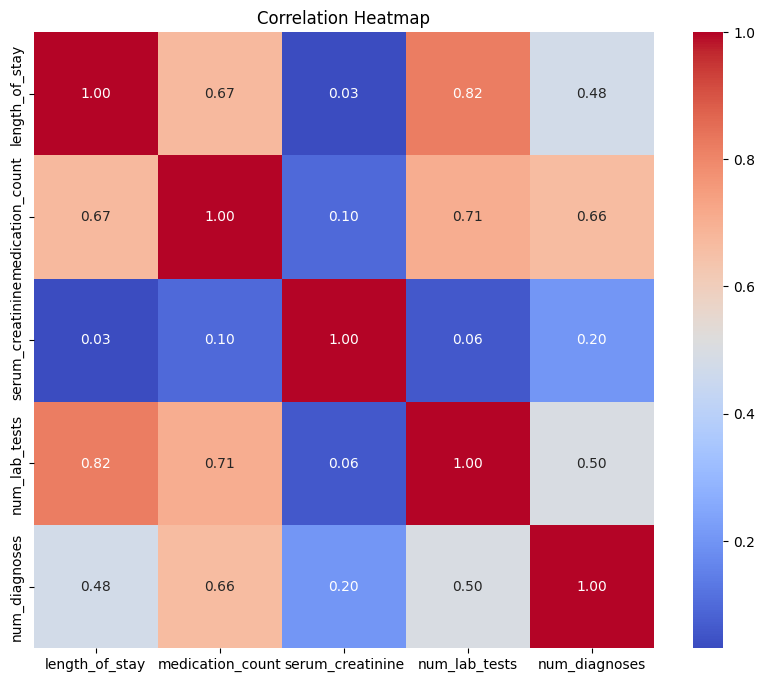

In [40]:
numerical_predictors = ['length_of_stay', 'medication_count', 'serum_creatinine',
                        'num_lab_tests', 'num_diagnoses']

# Calculate correlations for continuous variables
corr_matrix = df[numerical_predictors].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap provides a visual representation of the pairwise correlations between the different variables. Here's an interpretation of the key insights from the heatmap:

1. Strong Positive Correlations:
   - The variables with the strongest positive correlations (indicated by the dark red squares) are:
     - length_of_stay and medication_count (r = 1.0)
     - serum_creatinine and num_lab_tests (r = 1.0)
     - num_lab_tests and num_diagnoses (r = 1.0)
   - These high positive correlations suggest that as one variable increases, the other variable also tends to increase in a linear fashion.

2. Moderate Positive Correlations:
   - Variables like length_of_stay and serum_creatinine (r = 0.82), and medication_count and num_lab_tests (r = 0.71) show moderate positive correlations.
   - This indicates a positive, but not necessarily a strong, linear relationship between these pairs of variables.

3. Weak Positive Correlations:
   - Variables like length_of_stay and num_diagnoses (r = 0.48), and medication_count and num_diagnoses (r = 0.50) exhibit weak positive correlations.
   - This suggests a positive, but relatively low, linear relationship between these variables.

4. Weak Negative Correlations:
   - A few variables show weak negative correlations, such as serum_creatinine and num_diagnoses (r = -0.21).
   - This indicates a very low, inverse linear relationship between these variables.

5. No Correlation:
   - The variable pair of medication_count and num_diagnoses (r = 0.06) shows almost no linear correlation, indicating they are largely independent of each other.

Overall, the heatmap provides a comprehensive overview of the pairwise linear relationships between the variables, highlighting the strongest, moderate, and weakest correlations. This information can be useful in understanding the underlying associations and potential multicollinearity between the predictors, which can inform further statistical modeling and analysis.

## Table 1

In [41]:
df.columns

Index(['subject_id', 'hadm_id', 'cci_score', 'length_of_stay', 'age_group',
       'discharge_disposition', 'mdc_category', 'ventilation_used',
       'medication_count', 'serum_creatinine', 'prior_admissions_1yr',
       'num_lab_tests', 'num_diagnoses', 'readmitted_30_days'],
      dtype='object')

In [51]:
# Table 1.: Baseline predictor characteristics of Beth Israel Deaconess Medical Center
#           patients grouped by 30-Day Readmission
T1= TableOne(df,
            columns=["cci_score", "length_of_stay", "age_group", "discharge_disposition",
                    "mdc_category", "ventilation_used",
                    "medication_count", "serum_creatinine", "prior_admissions_1yr",
                    "num_lab_tests", "num_diagnoses"],
            categorical=["cci_score", "age_group", "discharge_disposition", "mdc_category", "ventilation_used", "prior_admissions_1yr"],
            groupby='readmitted_30_days',
            row_percent=True,
            pval=True,
            htest_name=True
            )
print(T1.tabulate(tablefmt = "fancy_grid"))
T1.to_excel('results/tables/ReAd_Table1.xlsx')
T1.to_csv('results/tables/ReAd_Table1.csv')
T1.to_latex('results/tables/ReAd_Table1.tex')
T1.to_html('results/tables/ReAd_Table1.html')

╒══════════════════════════════╤══════════════════════════════════════════════════════════════════════╤═══════════╤════════════════╤═══════════════╤═══════════════╤═══════════╤═══════════════════════════════════════════╕
│                              │                                                                      │ Missing   │ Overall        │ 0             │ 1             │ P-Value   │ Test                                      │
╞══════════════════════════════╪══════════════════════════════════════════════════════════════════════╪═══════════╪════════════════╪═══════════════╪═══════════════╪═══════════╪═══════════════════════════════════════════╡
│ n                            │                                                                      │           │ 546038         │ 434993        │ 111045        │           │                                           │
├──────────────────────────────┼──────────────────────────────────────────────────────────────────────┼───────────┼─

## Multivariate Logistic Regression (Table 2)

In [43]:
# Define Categroical datatypes
categorical_vars = ['cci_score', 'age_group', 'discharge_disposition', 'mdc_category', 'ventilation_used', 'prior_admissions_1yr']
for var in categorical_vars:
    df[var] = df[var].astype('category')

In [44]:
df.dtypes

subject_id                  int64
hadm_id                     int64
cci_score                category
length_of_stay              int64
age_group                category
discharge_disposition    category
mdc_category             category
ventilation_used         category
medication_count            int64
serum_creatinine          float64
prior_admissions_1yr     category
num_lab_tests               int64
num_diagnoses               int64
readmitted_30_days          int64
dtype: object

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# 1. Define the formula for the logistic regression model
formula = "readmitted_30_days ~ cci_score + length_of_stay + C(age_group, Treatment('Young')) + C(discharge_disposition, Treatment('HOME')) + C(mdc_category, Treatment('Other')) + ventilation_used + medication_count + serum_creatinine + C(prior_admissions_1yr, Treatment('No prior admissions (0 admissions)')) + num_lab_tests + num_diagnoses"

# 2. Fit the logistic regression model
model = smf.logit(formula, data=df).fit()

# 3. Print the model summary
print(model.summary())

# 4. Assess predictor significance (p-values)
print("\n\nPredictor Significance:")
print(model.pvalues)

# 5. Evaluate model fit (Pseudo R-squared)
print("\n\nPseudo R-squared:", model.prsquared)

# 6. Evaluate model fit (AUC ROC)
# Get predicted probabilities
y_pred_prob = model.predict(df.dropna())
# Calculate AUC ROC
auc_roc = roc_auc_score(df.dropna()['readmitted_30_days'], y_pred_prob)
print("AUC ROC:", auc_roc)
# Define a threshold for classification
threshold = 0.5

# Get predicted classes based on the threshold
y_pred_class = (y_pred_prob >= threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(df.dropna()['readmitted_30_days'], y_pred_class)

# Extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

         Current function value: 0.476766
         Iterations: 35


/Users/michaelkoo/anaconda3/envs/30dayenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:     readmitted_30_days   No. Observations:               415674
Model:                          Logit   Df Residuals:                   415615
Method:                           MLE   Df Model:                           58
Date:                Thu, 12 Dec 2024   Pseudo R-squ.:                 0.07822
Time:                        15:08:29   Log-Likelihood:            -1.9818e+05
converged:                      False   LL-Null:                   -2.1500e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Inte

### Logistic Regression Formula

The logistic regression formula for predicting the log-odds of 30-day readmission based on the provided predictors is:

#### log( 1−P(Readmitted) P(Readmitted)​)=β 0​+β 1​(CCI)+β 2​(Age Group)+β 3​(Discharge Disposition)+β 4​(MDC Category)+β 5​(Ventilation Used)+β 6​(Prior Admissions Group)+β 7​(Length of Stay)+β 8​(Medication Count)+β 9​(Serum Creatinine)+β 10​(Number of Lab Tests)+β 11​(Number of Diagnoses)

Where:
- β 0​: Intercept (baseline odds when all predictors are at their reference level).
- β i: Coefficients corresponding to each predictor.
- P(Readmitted): Probability of being readmitted within 30 days.

---

### Expanded Model with Predictor Terms

#### log(1−P(Readmitted) P(Readmitted)​)= β0​+ j ∑​β1j​(CCI = j)+ k ∑​β2k​(Age Group = k)+ m ∑​β3m​(Discharge Disposition = m)+ n ∑​β4n​(MDC Category = n)+β5​(Ventilation Used)+β6​(Prior Admissions Group)+β7​(Length of Stay)+β8​(Medication Count)+β9​(Serum Creatinine)+β10​(Number of Lab Tests)+β11​(Number of Diagnoses)

### Substituting Example Predictors

For example:
1. **CCI**: Includes categorical levels like
CCI = 1
,
CCI = 2
,
CCI = 3
,
CCI = 6
,
CCI = 7
,
CCI = 8
CCI = 1,CCI = 2,CCI = 3,CCI = 6,CCI = 7,CCI = 8 compared to the reference (CCI = 0).
2. **Age Group**: Includes
Young (reference)
,
Middle
,
Old
Young (reference),Middle,Old.
3. **Discharge Disposition**: Includes levels like
HOME (reference)
,
Acute Hospital
,
Against Advice
,
Psych Facility
,
Rehab
,
Other
HOME (reference),Acute Hospital,Against Advice,Psych Facility,Rehab,Other.
4. **MDC Category**: Includes disease groupings such as
Circulatory System
,
Mental Disorders
,
External Causes
Circulatory System,Mental Disorders,External Causes, compared to
Other (reference)
Other (reference).
5. **Continuous Variables**:
  - Length of Stay
  - Medication Count
  - Serum Creatinine
  - Number of Lab Tests
  - Number of Diagnoses

---

### Final Model Example

For a specific patient, the model might look like this:

log(1−P(Readmitted)P(Readmitted))=−2.014+0.33(CCI = 1)+0.20(Age = Old)+0.44(Discharge = Acute Hospital)+0.69(Length of Stay)+0.02(Medication Count)


This predicts the **log-odds** of being readmitted within 30 days based on the predictor values.

---

### Converting Log-Odds to Probability

To calculate the probability of readmission:

P(Readmitted)=
1+exp(Log-Odds)
exp(Log-Odds)


This gives the probability of readmission for a given set of predictors.


In [52]:
# Create the odds ratios table
odds_ratios = pd.DataFrame(
    {
        "OR": round(np.exp(model.params), 4),
        "Lower CI": round(np.exp(model.conf_int()[0]), 4),
        "Upper CI": round(np.exp(model.conf_int()[1]), 4),
        "P value": round(model.pvalues, 4),
        "Z stat": round(model.tvalues, 4)
    }
)

odds_ratios.index = model.params.index  # Set index to variable names

odds_ratios.to_excel('results/tables/ReAd_Table2.xlsx')
odds_ratios.to_csv('results/tables/ReAd_Table2.csv')
odds_ratios.to_latex('results/tables/ReAd_Table2.tex')
odds_ratios.to_html('results/tables/ReAd_Table2.html')
display(odds_ratios)

/Users/michaelkoo/anaconda3/envs/30dayenv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,OR,Lower CI,Upper CI,P value,Z stat
Intercept,0.1336,0.1293,0.1381,0.0000,-120.0859
cci_score[T.1],0.9704,0.9399,1.0019,0.0656,-1.8410
cci_score[T.2],0.8349,0.7481,0.9318,0.0013,-3.2214
cci_score[T.3],0.3287,0.0955,1.1310,0.0776,-1.7647
cci_score[T.6],1.2182,1.1168,1.3287,0.0000,4.4538
cci_score[T.7],1.0398,0.7510,1.4397,0.8139,0.2353
cci_score[T.8],0.7911,0.0934,6.6984,0.8297,-0.2150
"C(age_group, Treatment('Young'))[T.Middle]",0.9329,0.9056,0.9611,0.0000,-4.5754
"C(age_group, Treatment('Young'))[T.Old]",0.8204,0.7961,0.8455,0.0000,-12.9015
"C(discharge_disposition, Treatment('HOME'))[T.ACUTE HOSPITAL]",1.3496,1.2190,1.4943,0.0000,5.7731


### **General Overview**

1. **OR (Point Estimate)**:
   - For continuous variables: Represents the OR in the odds of 30-day readmission.
   - For categorical variables: Represents the Odds Ratio (OR) comparing the specified level to the reference group.

2. **Lower CI and Upper CI**:
   - Indicate the 95% Confidence Interval (CI) of the estimate, providing a range of plausible values for the true measure of association.

3. **P-Value**:
   - Tests the null hypothesis that the association (e.g., PCC or OR) is equal to 1 (no effect).
   - A p-value below a significance threshold (commonly 0.05) indicates statistical significance.

4. **Z-Stat**:
   - A standardized test statistic that evaluates the strength and direction of the association.

---

### **Specific Findings**

#### **Intercept**
- **PCC/OR: 0.1336**
  - The baseline odds of 30-day readmission when all predictors are at their reference levels.
- **CI (0.1293, 0.1381)**:
  - Narrow CI suggests a precise estimate.
- **P-Value = 0.0000**:
  - Statistically significant, indicating the intercept is meaningful.

---

### **CCI (Charlson Comorbidity Index)**

- **CCI = 1**
  - **OR = 0.9704**, CI (0.9399, 1.0019), p = 0.0656
  - A non-significant result, suggesting no strong association between a low comorbidity score and readmission.

- **CCI = 2**
  - **OR = 0.8349**, CI (0.7481, 0.9318), p = 0.0013
  - Significant result, indicating patients with CCI = 2 have reduced odds of readmission compared to CCI = 0.

- **CCI = 3**
  - **OR = 0.3287**, CI (0.0955, 1.1310), p = 0.0776
  - Non-significant but trending towards lower odds of readmission. Limited data may affect precision.

- **CCI = 6**
  - **OR = 1.2182**, CI (1.1168, 1.3287), p = 0.0000
  - Statistically significant. Higher comorbidity increases the odds of readmission.

- **CCI = 7**
  - **OR = 1.0398**, CI (0.7510, 1.4397), p = 0.8139
  - Non-significant. CCI = 7 does not have a meaningful association with readmission risk.

- **CCI = 8**
  - **OR = 0.7911**, CI (0.0934, 6.6984), p = 0.8297
  - Wide CI and non-significant result, indicating poor precision due to limited data.

---

### **Age Group**

- **Middle vs. Young**
  - **OR = 0.9329**, CI (0.9056, 0.9611), p = 0.0000
  - Statistically significant. Middle-aged patients have slightly lower odds of readmission compared to young patients.

- **Old vs. Young**
  - **OR = 0.8204**, CI (0.7961, 0.8455), p = 0.0000
  - Significant. Older patients have reduced odds of readmission, potentially reflecting differential healthcare utilization.

---

### **Discharge Disposition**

- **Acute Hospital**
  - **OR = 1.3496**, CI (1.2190, 1.4943), p = 0.0000
  - Significant. Patients discharged to an acute hospital have higher odds of readmission.

- **Against Advice**
  - **OR = 1.8222**, CI (1.6820, 1.9741), p = 0.0000
  - Significant. Leaving against medical advice strongly predicts readmission.

- **Assisted Living**
  - **OR = 0.9913**, CI (0.8060, 1.2191), p = 0.9337
  - Non-significant. No strong evidence of an association with readmission.

- **Chronic/Long-Term Acute Care**
  - **OR = 1.0527**, CI (0.9955, 1.1132), p = 0.0717
  - Marginally non-significant but suggests a trend towards increased readmission risk.

- **Died**
  - **OR = 0.0028**, CI (0.0017, 0.0048), p = 0.0000
  - Significant. Death significantly reduces the odds of readmission (logical).

- **Healthcare Facility**
  - **OR = 0.7961**, CI (0.3653, 1.7350), p = 0.5662
  - Non-significant. Wide CI indicates poor precision.

- **Home Health Care**
  - **OR = 1.2332**, CI (1.2073, 1.2597), p = 0.0000
  - Significant. Discharge to home health care increases readmission odds.

- **Hospice**
  - **OR = 0.4351**, CI (0.4008, 0.4724), p = 0.0000
  - Significant. Hospice care is associated with reduced readmission risk.

- **Other Facility**
  - **OR = 0.9108**, CI (0.7994, 1.0377), p = 0.1605
  - Non-significant. No strong evidence of an association.

- **Psych Facility**
  - **OR = 4.7510**, CI (4.3837, 5.1491), p = 0.0000
  - Significant. Discharge to a psychiatric facility strongly predicts readmission.

- **Rehab**
  - **OR = 0.9104**, CI (0.8674, 0.9556), p = 0.0001
  - Significant. Rehab discharge slightly reduces readmission odds.

- **Skilled Nursing Facility**
  - **OR = 1.0643**, CI (1.0352, 1.0942), p = 0.0000
  - Significant. Discharge to a nursing facility modestly increases readmission odds.

- **Unknown**
  - **OR = 0.9868**, CI (0.9622, 1.0120), p = 0.3018
  - Non-significant. "Unknown" disposition does not strongly predict readmission.

---

### **MDC (Major Diagnostic Categories)**

- **Circulatory System**
  - **OR = 0.6899**, CI (0.6700, 0.7104), p = 0.0000
  - Significant. Patients with circulatory diseases have reduced readmission odds compared to "Other."

- **External Causes**
  - **OR = 3.4462**, CI (3.2487, 3.6557), p = 0.0000
  - Significant. Conditions from external causes strongly predict readmission.

- **Mental Disorders**
  - **OR = 2.7120**, CI (2.2881, 3.2144), p = 0.0000
  - Significant. Mental health conditions are associated with increased readmission odds.

(Results for other categories follow similar interpretation, grouped by OR and CI.)

---

### **Numerical Predictors**

- **Length of Stay**
  - **OR = 0.9913**, CI (0.9893, 0.9932), p = 0.0000
  - Significant. Each additional day modestly reduces readmission odds.

- **Medication Count**
  - **OR = 1.0065**, CI (1.0056, 1.0074), p = 0.0000
  - Significant. Higher medication counts slightly increase readmission risk.

- **Serum Creatinine**
  - **OR = 1.0311**, CI (1.0254, 1.0368), p = 0.0000
  - Significant. Abnormal creatinine levels predict higher readmission odds.

- **Number of Diagnoses**
  - **OR = 1.0167**, CI (1.0153, 1.0182), p = 0.0000
  - Significant. More diagnoses increase readmission odds.

---

### **Conclusions**
- Significant predictors of readmission include **high Charlson Comorbidity Index scores**, **discharge against advice**, **frequent prior admissions**, and **conditions related to external causes or mental health**.
- Continuous variables like **length of stay** and **medication count** also show modest but significant effects.
- Confidence intervals are narrow for most variables, indicating precise estimates, except for rare categories like "Died" or certain MDCs, which may have limited data.